#           F20DL DATA MINING AND MACHINE LEARNING 
#           CW PART 1 - DATA ANALYSIS AND BAYES NETS

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import sklearn
assert sklearn.__version__ >= "0.20"

# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
# to plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns # for statistical data visualization

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Loading the data set

###### indian_food_final.csv is a CSV file that contains information (ingredients, preparation time, cooking time, etc) about 387 different Indian foods.

In [4]:
food = pd.read_csv('C:/Users/cathe/Desktop/indian_food_final.csv')
# food is a pandas DataFrame object containing all the data in indian_food_final.csv
food.head()
# displaying top 5 rows of the DataFrame

,name,ingredients,prep_time,cook_time,flavor_profile,course,state,region,diet
0,Balu shahi,"Maida flour, yogurt, oil, sugar",45,25,sweet,dessert,West Bengal,East,vegetarian
1,Boondi,"Gram flour, ghee, sugar",80,30,sweet,dessert,Rajasthan,West,vegetarian
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",15,60,sweet,dessert,Punjab,North,vegetarian
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",15,30,sweet,dessert,Rajasthan,West,vegetarian
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",15,40,sweet,dessert,West Bengal,East,vegetarian


###### The class attribute is 'diet', which leads to two classes, vegetarian and non vegetarian

## Initial Data Exploration and Visualization

In [5]:
food.info()
# This method prints information about the DataFrame including the columns and their dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            387 non-null    object
 1   ingredients     387 non-null    object
 2   prep_time       387 non-null    int64 
 3   cook_time       387 non-null    int64 
 4   flavor_profile  387 non-null    object
 5   course          387 non-null    object
 6   state           387 non-null    object
 7   region          386 non-null    object
 8   diet            387 non-null    object
dtypes: int64(2), object(7)
memory usage: 27.3+ KB


###### As seen above, all columns of the dataset are of object data type, except for 'prep_time' and 'cook_time', which are of data type int64. The attribute 'region' contains a null value. 

In [6]:
food['diet'].value_counts() 
# this method counts the number of unique values in the 'diet' attribute

vegetarian        342
non vegetarian     45
Name: diet, dtype: int64

In [7]:
food['flavor_profile'].value_counts()
# this method counts the number of unique values in the 'flavor_profile' attribute

spicy     212
sweet     123
-1         47
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [8]:
food['course'].value_counts()
# this method counts the number of unique values in the 'course' attribute

main course    181
dessert        109
snack           78
side dish       13
starter          6
Name: course, dtype: int64

In [9]:
food['state'].value_counts()
# this method counts the number of unique values in the 'state' attribute

Punjab              49
Gujarat             42
Maharashtra         40
West Bengal         33
Tamil Nadu          30
-1                  24
Assam               24
Karnataka           22
Kerala              22
Andhra Pradesh      20
Odisha              17
Uttar Pradesh       16
Rajasthan           11
Telangana           10
Goa                  7
Madhya Pradesh       3
Bihar                3
Jammu & Kashmir      2
Manipur              2
Haryana              2
Nagaland             1
Himachal Pradesh     1
NCT of Delhi         1
Delhi                1
Chhattisgarh         1
Uttarakhand          1
Punjab               1
Tripura              1
Name: state, dtype: int64

In [10]:
food['region'].value_counts()
# this method counts the number of unique values in the 'region' attribute

South         114
West           99
North          78
East           50
North East     28
-1             13
Central         4
Name: region, dtype: int64

###### The following attributes contain -1 values which can be considered as missing values : 'flavor_profile','state' and 'region'

In [11]:
food.describe()
#This method shows a statistical summary of the numerical attributes 

,prep_time,cook_time
count,387.000000,387.000000
mean,36.521964,28.529716
std,79.118861,20.198780
min,-1.000000,-1.000000
25%,10.000000,15.000000
50%,12.000000,30.000000
75%,20.000000,40.000000
max,500.000000,120.000000


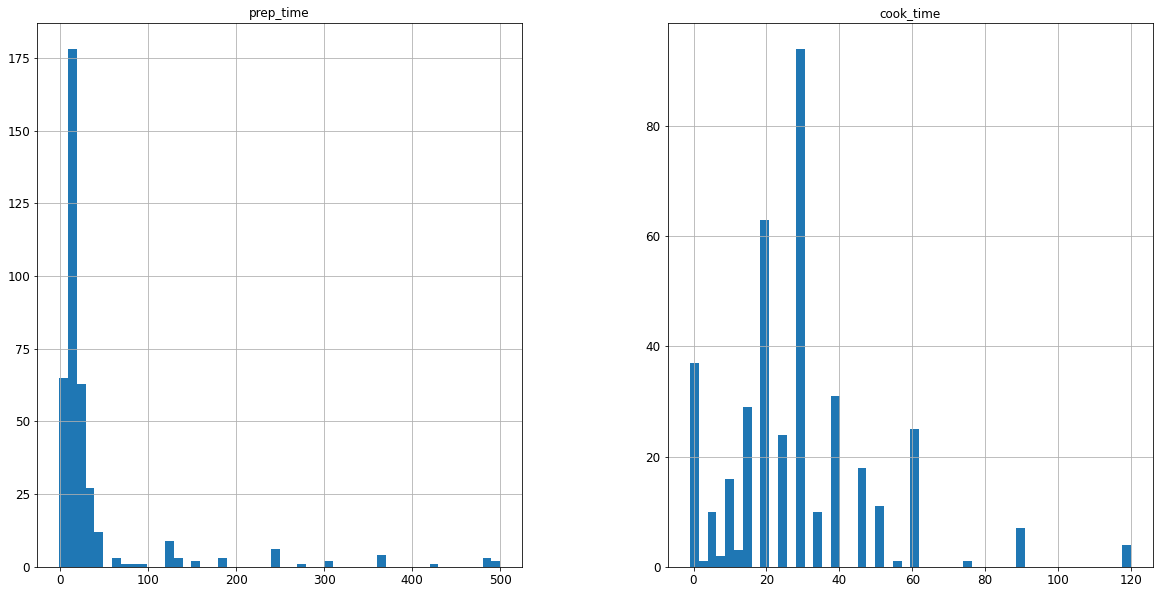

In [12]:
#To plot a histogram for each numerical attribute
food.hist(bins=50, figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='prep_time', ylabel='cook_time'>

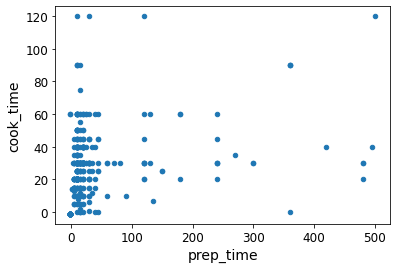

In [13]:
# scatter plot
food.plot(kind="scatter", x="prep_time", y="cook_time")

In [14]:
food_incomplete_rows = food[food.isnull().any(axis=1)].head()
food_incomplete_rows   # display rows with missing values

,name,ingredients,prep_time,cook_time,flavor_profile,course,state,region,diet
109,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",10,25,sweet,dessert,Uttar Pradesh,NaN,vegetarian


In [15]:
# getting rid of 'state' and 'region' attributes since they are not necessary for classifying food on the basis of diet
# and also since they contain -1 values
food_new = food.drop(["state","region"], axis=1) 
food_new

,name,ingredients,prep_time,cook_time,flavor_profile,course,diet
0,Balu shahi,"Maida flour, yogurt, oil, sugar",45,25,sweet,dessert,vegetarian
1,Boondi,"Gram flour, ghee, sugar",80,30,sweet,dessert,vegetarian
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",15,60,sweet,dessert,vegetarian
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",15,30,sweet,dessert,vegetarian
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",15,40,sweet,dessert,vegetarian
...,...,...,...,...,...,...,...
382,Sev mamra,"Puffed rice, sev, peanuts,oil,curry leaves,chi...",5,13,spicy,snack,vegetarian
383,Sabudana punugulu,"Sabudana,maida,salt,green chili,onion,ginger,o...",150,25,spicy,snack,vegetarian
384,Tele bhaja,"Eggplant, gram flour, rice flour, white poppy ...",10,10,spicy,snack,vegetarian
385,Avalose unda,"Rice, coconut, salt, cumin, sesame seeds, jagg...",420,40,sweet,snack,vegetarian


In [16]:
food_new.loc[food['prep_time'] == -1] # displaying rows with -1 values in the 'prep_time' attribute

,name,ingredients,prep_time,cook_time,flavor_profile,course,diet
19,Sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",-1,60,sweet,dessert,vegetarian
21,Chhena kheeri,"Chhena, sugar, milk",-1,60,sweet,dessert,vegetarian
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",-1,-1,spicy,main course,non vegetarian
131,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",-1,-1,spicy,main course,vegetarian
133,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",-1,-1,spicy,main course,vegetarian
147,Paravannam,"Raw rice, jaggery, milk",-1,-1,spicy,main course,vegetarian
151,Poriyal,"Chana dal, urad dal, beans, coconut, mustard",-1,-1,spicy,main course,vegetarian
166,Kolim Jawla,"Baingan, fish, coconut oil, fresh coconut, ginger",-1,-1,spicy,main course,non vegetarian
171,Bombil fry,"Bombay duck, malvani masala, rice flour, bomba...",-1,-1,spicy,main course,non vegetarian
184,Ghooghra,"Dry fruits, semolina, all purpose flour",-1,-1,spicy,snack,vegetarian


In [17]:
food_new.loc[food['cook_time'] == -1] # displaying rows with -1 values in the 'cook_time' attribute

,name,ingredients,prep_time,cook_time,flavor_profile,course,diet
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",-1,-1,spicy,main course,non vegetarian
131,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",-1,-1,spicy,main course,vegetarian
133,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",-1,-1,spicy,main course,vegetarian
147,Paravannam,"Raw rice, jaggery, milk",-1,-1,spicy,main course,vegetarian
151,Poriyal,"Chana dal, urad dal, beans, coconut, mustard",-1,-1,spicy,main course,vegetarian
166,Kolim Jawla,"Baingan, fish, coconut oil, fresh coconut, ginger",-1,-1,spicy,main course,non vegetarian
171,Bombil fry,"Bombay duck, malvani masala, rice flour, bomba...",-1,-1,spicy,main course,non vegetarian
184,Ghooghra,"Dry fruits, semolina, all purpose flour",-1,-1,spicy,snack,vegetarian
186,Halvasan,"Whole wheat rava, chia seed, lemon, edible gum...",-1,-1,sweet,dessert,vegetarian
212,Mag Dhokli,"Moong beans, jaggery, red chillies, oil, salt",-1,-1,spicy,snack,vegetarian


In [18]:
food_new.loc[food['flavor_profile'] == '-1'] # displaying rows with -1 values in the 'flavor_profile' attribute

,name,ingredients,prep_time,cook_time,flavor_profile,course,diet
78,Chapati,"Whole wheat flour, olive oil, hot water, all p...",10,10,-1,main course,vegetarian
103,Naan,"Whole wheat flour, honey, butter, garlic",60,30,-1,main course,vegetarian
115,Rongi,"Garam masala powder, tomato, kasuri methi, cin...",10,30,-1,main course,vegetarian
130,Kanji,"Rice,carrot, yellow mustard, red chilli, black...",10,45,-1,snack,vegetarian
144,Pachadi,"Coconut oil, cucumber, curd, curry leaves, mus...",10,25,-1,main course,vegetarian
145,Paniyaram,"Yogurt, ginger, curry leaves, baking soda, gre...",10,20,-1,main course,vegetarian
149,Paruppu sadam,"Arhar dal, sambar powder, tomato, curry leaves...",10,20,-1,main course,vegetarian
152,Puli sadam,"Urad dal, lemon, tamarind, cooked rice, curry ...",10,20,-1,main course,vegetarian
154,Puttu,"Brown rice flour, sugar, grated coconut",495,40,-1,main course,vegetarian
156,Sandige,"Thin rice flakes, black sesame seeds, curry le...",120,60,-1,main course,vegetarian


In [19]:
# replacing all -1 values with NaN in the following attributes : 'prep_time','cook_time','flavor_profile'
food_new["prep_time"]=food_new["prep_time"].replace(-1, np.NaN)
food_new["cook_time"]=food_new["cook_time"].replace(-1, np.NaN)
food_new["flavor_profile"]=food_new["flavor_profile"].replace('-1', np.NaN)

In [20]:
median = food_new["prep_time"].median() # calculating the median of prep_time
food_new["prep_time"].fillna(median, inplace=True) # Filling missing values with the calculated median
food_new.head(30)

,name,ingredients,prep_time,cook_time,flavor_profile,course,diet
0,Balu shahi,"Maida flour, yogurt, oil, sugar",45.0,25.0,sweet,dessert,vegetarian
1,Boondi,"Gram flour, ghee, sugar",80.0,30.0,sweet,dessert,vegetarian
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",15.0,60.0,sweet,dessert,vegetarian
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",15.0,30.0,sweet,dessert,vegetarian
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",15.0,40.0,sweet,dessert,vegetarian
5,Imarti,"Sugar syrup, lentil flour",10.0,50.0,sweet,dessert,vegetarian
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",10.0,50.0,sweet,dessert,vegetarian
7,Kaju katli,"Cashews, ghee, cardamom, sugar",10.0,20.0,sweet,dessert,vegetarian
8,Kalakand,"Milk, cottage cheese, sugar",20.0,30.0,sweet,dessert,vegetarian
9,Kheer,"Milk, rice, sugar, dried fruits",10.0,40.0,sweet,dessert,vegetarian


In [21]:
median2 = food_new["cook_time"].median() # calculating the median of cook_time
food_new["cook_time"].fillna(median2, inplace=True) # Filling missing values with the calculated median
food_new.head(67)

,name,ingredients,prep_time,cook_time,flavor_profile,course,diet
0,Balu shahi,"Maida flour, yogurt, oil, sugar",45.0,25.0,sweet,dessert,vegetarian
1,Boondi,"Gram flour, ghee, sugar",80.0,30.0,sweet,dessert,vegetarian
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",15.0,60.0,sweet,dessert,vegetarian
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",15.0,30.0,sweet,dessert,vegetarian
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",15.0,40.0,sweet,dessert,vegetarian
...,...,...,...,...,...,...,...
62,Shrikhand,"Curd, sugar, saffron, cardamom",10.0,0.0,sweet,dessert,vegetarian
63,Sutar feni,"Maida, sugar, ghee",15.0,55.0,sweet,dessert,vegetarian
64,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",10.0,40.0,spicy,main course,non vegetarian
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",15.0,30.0,spicy,main course,non vegetarian


In [22]:
food_new["flavor_profile"].fillna('unknown', inplace=True) # filling missing values with 'unknown'
food_new.head(105)

,name,ingredients,prep_time,cook_time,flavor_profile,course,diet
0,Balu shahi,"Maida flour, yogurt, oil, sugar",45.0,25.0,sweet,dessert,vegetarian
1,Boondi,"Gram flour, ghee, sugar",80.0,30.0,sweet,dessert,vegetarian
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",15.0,60.0,sweet,dessert,vegetarian
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",15.0,30.0,sweet,dessert,vegetarian
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",15.0,40.0,sweet,dessert,vegetarian
...,...,...,...,...,...,...,...
100,Misi roti,"Whole wheat flour, chickpea flour, green chilies",30.0,30.0,spicy,main course,vegetarian
101,Mushroom do pyaza,"Mushroom, malai, garam masala, ginger, capsicum",10.0,30.0,spicy,main course,vegetarian
102,Mushroom matar,"Canned coconut milk, frozen green peas, wild m...",10.0,30.0,spicy,main course,vegetarian
103,Naan,"Whole wheat flour, honey, butter, garlic",60.0,30.0,unknown,main course,vegetarian


In [23]:
flavor_dummies = pd.get_dummies(food_new.flavor_profile,prefix='Flavor') # encoding 'flavor_profile' attribute
food_new = pd.concat([food_new, flavor_dummies], axis=1)

In [24]:
food_new

,name,ingredients,prep_time,cook_time,flavor_profile,course,diet,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown
0,Balu shahi,"Maida flour, yogurt, oil, sugar",45.0,25.0,sweet,dessert,vegetarian,0,0,0,1,0
1,Boondi,"Gram flour, ghee, sugar",80.0,30.0,sweet,dessert,vegetarian,0,0,0,1,0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",15.0,60.0,sweet,dessert,vegetarian,0,0,0,1,0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",15.0,30.0,sweet,dessert,vegetarian,0,0,0,1,0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",15.0,40.0,sweet,dessert,vegetarian,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382,Sev mamra,"Puffed rice, sev, peanuts,oil,curry leaves,chi...",5.0,13.0,spicy,snack,vegetarian,0,0,1,0,0
383,Sabudana punugulu,"Sabudana,maida,salt,green chili,onion,ginger,o...",150.0,25.0,spicy,snack,vegetarian,0,0,1,0,0
384,Tele bhaja,"Eggplant, gram flour, rice flour, white poppy ...",10.0,10.0,spicy,snack,vegetarian,0,0,1,0,0
385,Avalose unda,"Rice, coconut, salt, cumin, sesame seeds, jagg...",420.0,40.0,sweet,snack,vegetarian,0,0,0,1,0


In [25]:
course_dummies = pd.get_dummies(food_new.course,prefix='Course') # encoding 'course' attribute
food_new = pd.concat([food_new, course_dummies], axis=1)

In [26]:
food_new

,name,ingredients,prep_time,cook_time,flavor_profile,course,diet,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter
0,Balu shahi,"Maida flour, yogurt, oil, sugar",45.0,25.0,sweet,dessert,vegetarian,0,0,0,1,0,1,0,0,0,0
1,Boondi,"Gram flour, ghee, sugar",80.0,30.0,sweet,dessert,vegetarian,0,0,0,1,0,1,0,0,0,0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",15.0,60.0,sweet,dessert,vegetarian,0,0,0,1,0,1,0,0,0,0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",15.0,30.0,sweet,dessert,vegetarian,0,0,0,1,0,1,0,0,0,0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",15.0,40.0,sweet,dessert,vegetarian,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Sev mamra,"Puffed rice, sev, peanuts,oil,curry leaves,chi...",5.0,13.0,spicy,snack,vegetarian,0,0,1,0,0,0,0,0,1,0
383,Sabudana punugulu,"Sabudana,maida,salt,green chili,onion,ginger,o...",150.0,25.0,spicy,snack,vegetarian,0,0,1,0,0,0,0,0,1,0
384,Tele bhaja,"Eggplant, gram flour, rice flour, white poppy ...",10.0,10.0,spicy,snack,vegetarian,0,0,1,0,0,0,0,0,1,0
385,Avalose unda,"Rice, coconut, salt, cumin, sesame seeds, jagg...",420.0,40.0,sweet,snack,vegetarian,0,0,0,1,0,0,0,0,1,0


In [27]:
diet_dummies = pd.get_dummies(food_new.diet,prefix='Diet') # encoding 'diet' attribute
food_new = pd.concat([food_new, diet_dummies], axis=1)

In [28]:
food_new

,name,ingredients,prep_time,cook_time,flavor_profile,course,diet,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter,Diet_non vegetarian,Diet_vegetarian
0,Balu shahi,"Maida flour, yogurt, oil, sugar",45.0,25.0,sweet,dessert,vegetarian,0,0,0,1,0,1,0,0,0,0,0,1
1,Boondi,"Gram flour, ghee, sugar",80.0,30.0,sweet,dessert,vegetarian,0,0,0,1,0,1,0,0,0,0,0,1
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",15.0,60.0,sweet,dessert,vegetarian,0,0,0,1,0,1,0,0,0,0,0,1
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",15.0,30.0,sweet,dessert,vegetarian,0,0,0,1,0,1,0,0,0,0,0,1
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",15.0,40.0,sweet,dessert,vegetarian,0,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Sev mamra,"Puffed rice, sev, peanuts,oil,curry leaves,chi...",5.0,13.0,spicy,snack,vegetarian,0,0,1,0,0,0,0,0,1,0,0,1
383,Sabudana punugulu,"Sabudana,maida,salt,green chili,onion,ginger,o...",150.0,25.0,spicy,snack,vegetarian,0,0,1,0,0,0,0,0,1,0,0,1
384,Tele bhaja,"Eggplant, gram flour, rice flour, white poppy ...",10.0,10.0,spicy,snack,vegetarian,0,0,1,0,0,0,0,0,1,0,0,1
385,Avalose unda,"Rice, coconut, salt, cumin, sesame seeds, jagg...",420.0,40.0,sweet,snack,vegetarian,0,0,0,1,0,0,0,0,1,0,0,1


In [29]:
food_new.rename(columns={'Diet_non vegetarian': 'Diet_non_vegetarian'}, inplace=True)

In [30]:
# Now we will look at the correlation of all the attributes with each other
corr_matrix = food_new.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [31]:
corr_matrix

,prep_time,cook_time,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter,Diet_non_vegetarian,Diet_vegetarian
prep_time,1.000000,0.219511,-0.029617,-0.017991,-0.027472,-0.024359,0.088549,-0.080096,-0.002372,-0.047641,0.097883,0.052840,-0.037389,0.037389
cook_time,0.219511,1.000000,0.037342,-0.057427,-0.059441,0.123872,-0.088645,0.130046,0.029860,-0.170625,-0.102950,-0.010946,0.065775,-0.065775
Flavor_bitter,-0.029617,0.037342,1.000000,-0.005202,-0.112481,-0.069756,-0.037996,-0.063991,0.057820,-0.019053,0.012343,-0.012825,-0.037070,0.037070
Flavor_sour,-0.017991,-0.057427,-0.005202,1.000000,-0.056022,-0.034742,-0.018924,-0.031871,0.054300,-0.009489,-0.025573,-0.006387,-0.018463,0.018463
Flavor_spicy,-0.027472,-0.059441,-0.112481,-0.056022,1.000000,-0.751276,-0.409221,-0.689191,0.268949,0.169390,0.327058,0.114016,0.264784,-0.264784
Flavor_sweet,-0.024359,0.123872,-0.069756,-0.034742,-0.751276,1.000000,-0.253782,0.917361,-0.550842,-0.127258,-0.259940,-0.085657,-0.230285,0.230285
Flavor_unknown,0.088549,-0.088645,-0.037996,-0.018924,-0.409221,-0.253782,1.000000,-0.232809,0.349083,-0.069318,-0.127642,-0.046658,-0.060833,0.060833
Course_dessert,-0.080096,0.130046,-0.063991,-0.031871,-0.689191,0.917361,-0.232809,1.000000,-0.586944,-0.116742,-0.314600,-0.078579,-0.227135,0.227135
Course_main course,-0.002372,0.029860,0.057820,0.054300,0.268949,-0.550842,0.349083,-0.586944,1.000000,-0.174760,-0.470949,-0.117630,0.257736,-0.257736
Course_side dish,-0.047641,-0.170625,-0.019053,-0.009489,0.169390,-0.127258,-0.069318,-0.116742,-0.174760,1.000000,-0.093671,-0.023396,-0.067628,0.067628


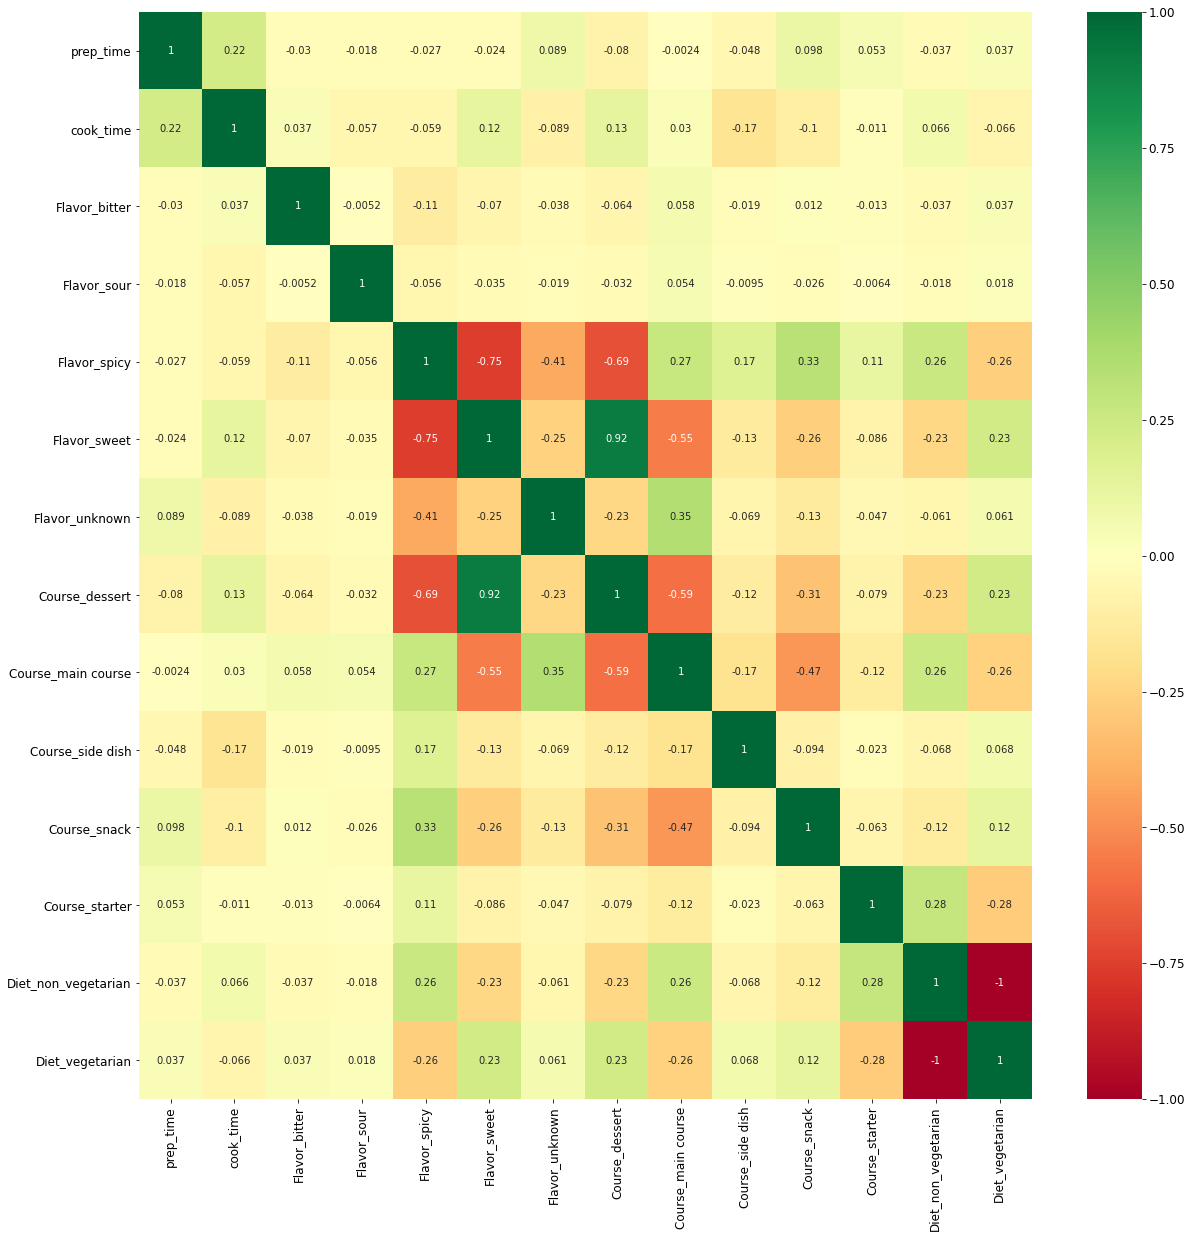

In [32]:
# plotting heat map representing correlation of all attributes with each other
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(food_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
# dropping the following attributes,'flavor_profile' and 'course', since they are already encoded
food_new=food_new.drop(['flavor_profile','course'],axis=1)
food_new.head()

,name,ingredients,prep_time,cook_time,diet,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter,Diet_non_vegetarian,Diet_vegetarian
0,Balu shahi,"Maida flour, yogurt, oil, sugar",45.0,25.0,vegetarian,0,0,0,1,0,1,0,0,0,0,0,1
1,Boondi,"Gram flour, ghee, sugar",80.0,30.0,vegetarian,0,0,0,1,0,1,0,0,0,0,0,1
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",15.0,60.0,vegetarian,0,0,0,1,0,1,0,0,0,0,0,1
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",15.0,30.0,vegetarian,0,0,0,1,0,1,0,0,0,0,0,1
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",15.0,40.0,vegetarian,0,0,0,1,0,1,0,0,0,0,0,1


## Running Naive Bayes Classifier

### Declare feature vector and target variable 

In [34]:
X = food_new.drop(['name','ingredients','diet','Diet_vegetarian','Diet_non_vegetarian'], axis=1)
# X will contain all the input features except 'name' and 'ingredients', since they are not numerical attributes
X.head()

,prep_time,cook_time,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter
0,45.0,25.0,0,0,0,1,0,1,0,0,0,0
1,80.0,30.0,0,0,0,1,0,1,0,0,0,0
2,15.0,60.0,0,0,0,1,0,1,0,0,0,0
3,15.0,30.0,0,0,0,1,0,1,0,0,0,0
4,15.0,40.0,0,0,0,1,0,1,0,0,0,0


In [35]:
Y = food_new['diet']
# Y will contain the class attribute 'diet'
Y.head()

0    vegetarian
1    vegetarian
2    vegetarian
3    vegetarian
4    vegetarian
Name: diet, dtype: object

### Splitting data into separate training and test set

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [37]:
X_train.shape, X_test.shape

((270, 12), (117, 12))

In [38]:
X_train.dtypes

prep_time             float64
cook_time             float64
Flavor_bitter           uint8
Flavor_sour             uint8
Flavor_spicy            uint8
Flavor_sweet            uint8
Flavor_unknown          uint8
Course_dessert          uint8
Course_main course      uint8
Course_side dish        uint8
Course_snack            uint8
Course_starter          uint8
dtype: object

In [39]:
X_train.head()

,prep_time,cook_time,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter
66,240.0,45.0,0,0,0,1,0,1,0,0,0,0
218,12.0,40.0,0,0,0,1,0,1,0,0,0,0
153,10.0,35.0,0,0,1,0,0,0,1,0,0,0
12,20.0,30.0,0,0,0,1,0,1,0,0,0,0
101,10.0,30.0,0,0,1,0,0,0,1,0,0,0


In [40]:
X_test.head()

,prep_time,cook_time,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter
54,40.0,15.0,0,0,0,1,0,1,0,0,0,0
124,30.0,45.0,0,0,1,0,0,0,1,0,0,0
312,120.0,30.0,0,0,0,0,1,0,1,0,0,0
175,20.0,30.0,0,0,0,0,1,0,1,0,0,0
281,5.0,15.0,0,0,0,1,0,1,0,0,0,0


### Feature scaling

###### All feature variables must be mapped onto the same scale before training the Naive Bayes Classifier on them

In [41]:
cols = X_train.columns

In [42]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=[cols])

X_test = pd.DataFrame(X_test,columns=[cols])

In [43]:
X_train.head()

,prep_time,cook_time,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter
0,22.5,0.75,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.3,0.50,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.5,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.5,0.00,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
X_test.head()

,prep_time,cook_time,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter
0,2.5,-0.75,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.5,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10.5,0.00,0.0,0.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.5,0.00,0.0,0.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.0,-0.75,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### Model training

In [45]:
# training a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiating the model
GNB = GaussianNB()
# fitting the model
GNB.fit(X_train, Y_train)

GaussianNB()

### Predicting the results

In [46]:
Y_pred = GNB.predict(X_test)

Y_pred

array(['vegetarian', 'non vegetarian', 'non vegetarian', 'non vegetarian',
       'vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian', 'vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'vegetarian',
       'non vegetarian', 'vegetarian', 'non vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian', 'vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian', 'vegetarian',
       'vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'vegetarian', 'vegetarian', 'non vegetarian', 'vegetaria

### Checking accuracy score

In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score: 0.4786


In [48]:
# printing the scores on training and test set to check for overfitting and underfitting

print('Training set score: {:.4f}'.format(GNB.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(GNB.score(X_test, Y_test)))

Training set score: 0.4926
Test set score: 0.4786


###### Both values are quite comparable, so there are no signs of overfitting or underfitting

In [49]:
# checking class distribution in test set

Y_test.value_counts()

vegetarian        98
non vegetarian    19
Name: diet, dtype: int64

In [50]:
# checking null accuracy score to compare with model accuracy score
# Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
null_accuracy = (98/(98+19))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8376


###### The model accuracy score is 0.4786 but null accuracy score is 0.8376. So, we can conclude that our Gaussian Naive Bayes Classification model is not doing a good job in predicting the class labels.

### Confusion Matrix

In [51]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_test, Y_pred)

print('Confusion matrix\n\n', conf_mat)

print('\nTrue Positives(TP) = ', conf_mat[0,0])

print('\nTrue Negatives(TN) = ', conf_mat[1,1])

print('\nFalse Positives(FP) = ', conf_mat[0,1])

print('\nFalse Negatives(FN) = ', conf_mat[1,0])

Confusion matrix

 [[18  1]
 [60 38]]

True Positives(TP) =  18

True Negatives(TN) =  38

False Positives(FP) =  1

False Negatives(FN) =  60


###### The confusion matrix shows 18 + 38 = 56 correct predictions and 1 + 60 = 61 incorrect predictions.

<AxesSubplot:>

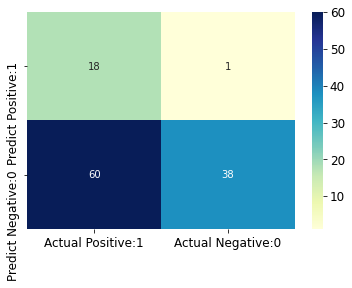

In [52]:
# visualizing confusion matrix with seaborn heatmap

cm_map = pd.DataFrame(data=conf_mat, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_map, annot=True, fmt='d', cmap='YlGnBu')

### Classification Metrices

In [53]:
# Printing classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

                precision    recall  f1-score   support

non vegetarian       0.23      0.95      0.37        19
    vegetarian       0.97      0.39      0.55        98

      accuracy                           0.48       117
     macro avg       0.60      0.67      0.46       117
  weighted avg       0.85      0.48      0.52       117



In [54]:
TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

In [55]:
# printing success rate

success_rate = (TP + TN) / float(TP + TN + FP + FN)

print('Success rate : {0:0.4f}'.format(success_rate))

Success rate : 0.4786


In [56]:
# printing error rate

error_rate = (FP + FN) / float(TP + TN + FP + FN)

print('Error rate : {0:0.4f}'.format(error_rate))

Error rate : 0.5214


In [57]:
# Calculating True Positive Rate
tp_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(tp_rate))

True Positive Rate : 0.2308


In [58]:
# Calculating False Positive Rate
fp_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(fp_rate))

False Positive Rate : 0.0256


In [59]:
# printing precision score

prec = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(prec))

Precision : 0.9474


In [60]:
# printing recall score

recall = TP / float(TP + FN)

print('Recall : {0:0.4f}'.format(recall))

Recall : 0.2308


In [61]:
# Printing specificity

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9744


In [62]:
# printing F measure

f_measure = (2*recall*prec)/float(recall+prec)
print('F measure : {0:0.4f}'.format(f_measure))

F measure : 0.3711


### Conclusion
##### 1. A Gaussian Naïve Bayes Classifier model was built to predict whether a particular Indian food was vegetarian or non vegetarian .
##### 2. The accuracy of the model was 0.4786, which indicates that the model does not do a good job of predicting the class labels.
##### 3. The training-set accuracy score is 0.4926 while the test-set accuracy to be 0.4786. These two values are quite comparable. So, there is no sign of overfitting or underfitting.
##### 4. The null accuracy score is 0.8376. So, we can conclude that our Gaussian Naïve Bayes classifier model is not doing a good job in predicting the class labels.
##### 5. The confusion matrix shows 56 correct predictions and 61 incorrect predictions.
##### 6. The error rate is 0. 5214 and the success rate is 0.4786

## Feature Selection

In [63]:
# Displaying the correlation of all the attributes(encoded attributes) with class 'non vegetarian'
corr_matrix["Diet_non_vegetarian"].sort_values(ascending=False)

Diet_non_vegetarian    1.000000
Course_starter         0.280709
Flavor_spicy           0.264784
Course_main course     0.257736
cook_time              0.065775
Flavor_sour           -0.018463
Flavor_bitter         -0.037070
prep_time             -0.037389
Flavor_unknown        -0.060833
Course_side dish      -0.067628
Course_snack          -0.121966
Course_dessert        -0.227135
Flavor_sweet          -0.230285
Diet_vegetarian       -1.000000
Name: Diet_non_vegetarian, dtype: float64

###### The top four correlating attributes are : 'Course_starter', 'Flavor_spicy', 'Course_main course' and 'cook_time'

In [64]:
# Displaying the correlation of all the attributes(encoded attributes) with class 'vegetarian'
corr_matrix["Diet_vegetarian"].sort_values(ascending=False)

Diet_vegetarian        1.000000
Flavor_sweet           0.230285
Course_dessert         0.227135
Course_snack           0.121966
Course_side dish       0.067628
Flavor_unknown         0.060833
prep_time              0.037389
Flavor_bitter          0.037070
Flavor_sour            0.018463
cook_time             -0.065775
Course_main course    -0.257736
Flavor_spicy          -0.264784
Course_starter        -0.280709
Diet_non_vegetarian   -1.000000
Name: Diet_vegetarian, dtype: float64

###### The top four correlating attributes are : 'Flavor_sweet', 'Course_dessert', 'Course_snack' and 'Course_side dish'

In [65]:
# Dataset 1 which contains the topmost correlating attributes for each class and the class attribute 'diet'
food1 = food_new[['Flavor_sweet',
                  'Course_starter',
                  'diet']]
food1 

,Flavor_sweet,Course_starter,diet
0,1,0,vegetarian
1,1,0,vegetarian
2,1,0,vegetarian
3,1,0,vegetarian
4,1,0,vegetarian
...,...,...,...
382,0,0,vegetarian
383,0,0,vegetarian
384,0,0,vegetarian
385,1,0,vegetarian


In [66]:
# Dataset 2 which contains the top 2 correlating attributes for each class and the class attribute 'diet'
food2 = food_new[['Flavor_sweet','Course_dessert',
                  'Course_starter','Flavor_spicy',
                  'diet']]
food2

,Flavor_sweet,Course_dessert,Course_starter,Flavor_spicy,diet
0,1,1,0,0,vegetarian
1,1,1,0,0,vegetarian
2,1,1,0,0,vegetarian
3,1,1,0,0,vegetarian
4,1,1,0,0,vegetarian
...,...,...,...,...,...
382,0,0,0,1,vegetarian
383,0,0,0,1,vegetarian
384,0,0,0,1,vegetarian
385,1,0,0,0,vegetarian


In [67]:
# Dataset 3 which contains the top 4 correlating attributes for each class and the class attribute 'diet'
food3 = food_new[['Flavor_sweet','Course_dessert','Course_snack','Course_side dish',
                  'Course_starter','Flavor_spicy','Course_main course','cook_time',
                  'diet']]
food3 

,Flavor_sweet,Course_dessert,Course_snack,Course_side dish,Course_starter,Flavor_spicy,Course_main course,cook_time,diet
0,1,1,0,0,0,0,0,25.0,vegetarian
1,1,1,0,0,0,0,0,30.0,vegetarian
2,1,1,0,0,0,0,0,60.0,vegetarian
3,1,1,0,0,0,0,0,30.0,vegetarian
4,1,1,0,0,0,0,0,40.0,vegetarian
...,...,...,...,...,...,...,...,...,...
382,0,0,1,0,0,1,0,13.0,vegetarian
383,0,0,1,0,0,1,0,25.0,vegetarian
384,0,0,1,0,0,1,0,10.0,vegetarian
385,1,0,1,0,0,0,0,40.0,vegetarian


# Running Naive Bayes Classifier for Dataset 1

In [68]:
X1 = food1.drop(['diet'], axis=1)
# X1 will contain all the input features of food1
X1.head()

,Flavor_sweet,Course_starter
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [69]:
Y1 = food1['diet']
# Y1 will contain the class attribute 'diet'
Y1.head()

0    vegetarian
1    vegetarian
2    vegetarian
3    vegetarian
4    vegetarian
Name: diet, dtype: object

### Splitting data into separate training and test set

In [70]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.30, random_state = 0)

In [71]:
X1_train.shape, X1_test.shape

((270, 2), (117, 2))

In [72]:
X1_train.dtypes

Flavor_sweet      uint8
Course_starter    uint8
dtype: object

In [73]:
X1_train.head()

,Flavor_sweet,Course_starter
66,1,0
218,1,0
153,0,0
12,1,0
101,0,0


In [74]:
X1_test.head()

,Flavor_sweet,Course_starter
54,1,0
124,0,0
312,0,0
175,0,0
281,1,0


### Feature scaling

###### All feature variables must be mapped onto the same scale before training the Naive Bayes Classifier on them

In [75]:
cols1 = X1_train.columns

In [76]:
scaler1 = RobustScaler()

X1_train = scaler1.fit_transform(X1_train)

X1_test = scaler1.transform(X1_test)

X1_train = pd.DataFrame(X1_train,columns=[cols1])

X1_test = pd.DataFrame(X1_test,columns=[cols1])

In [77]:
X1_train.head()

,Flavor_sweet,Course_starter
0,1.0,0.0
1,1.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0


In [78]:
X1_test.head()

,Flavor_sweet,Course_starter
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0


### Model training

In [79]:
# training a Gaussian Naive Bayes classifier on the training set
# instantiating the model
GNB1 = GaussianNB()
# fitting the model
GNB1.fit(X1_train, Y1_train)

GaussianNB()

### Predicting the results

In [80]:
Y1_pred = GNB1.predict(X1_test)

Y1_pred

array(['vegetarian', 'non vegetarian', 'non vegetarian', 'non vegetarian',
       'vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian', 'vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'vegetarian',
       'non vegetarian', 'vegetarian', 'non vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian', 'vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian', 'vegetarian',
       'vegetarian', 'non vegetarian', 'non vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'vegetarian', 'vegetarian', 'non vegetarian', 'veget

### Checking accuracy score

In [81]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y1_test, Y1_pred)))

Model accuracy score: 0.4444


In [82]:
# printing the scores on training and test set to check for overfitting and underfitting

print('Training set score: {:.4f}'.format(GNB1.score(X1_train, Y1_train)))

print('Test set score: {:.4f}'.format(GNB1.score(X1_test, Y1_test)))

Training set score: 0.4222
Test set score: 0.4444


###### Both values are quite comparable, so there are no signs of overfitting or underfitting

In [83]:
# checking class distribution in test set

Y1_test.value_counts()

vegetarian        98
non vegetarian    19
Name: diet, dtype: int64

In [84]:
# checking null accuracy score to compare with model accuracy score

null_accuracy1 = (98/(98+19))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy1))

Null accuracy score: 0.8376


###### The model accuracy score is 0.4444 but null accuracy score is 0.8376. So, we can conclude that our Gaussian Naive Bayes Classification model is not doing a good job in predicting the class labels.

### Confusion Matrix

In [85]:
# Printing the Confusion Matrix and slice it into four pieces

conf_mat1 = confusion_matrix(Y1_test, Y1_pred)

print('Confusion matrix\n\n', conf_mat1)

print('\nTrue Positives(TP) = ', conf_mat1[0,0])

print('\nTrue Negatives(TN) = ', conf_mat1[1,1])

print('\nFalse Positives(FP) = ', conf_mat1[0,1])

print('\nFalse Negatives(FN) = ', conf_mat1[1,0])

Confusion matrix

 [[18  1]
 [64 34]]

True Positives(TP) =  18

True Negatives(TN) =  34

False Positives(FP) =  1

False Negatives(FN) =  64


###### The confusion matrix shows 18 + 34 = 52 correct predictions and 1 + 64 = 65 incorrect predictions.

<AxesSubplot:>

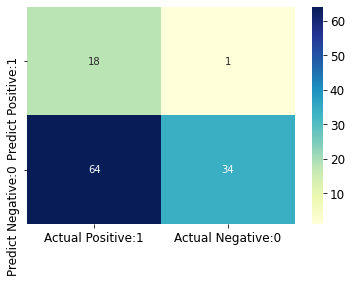

In [86]:
# visualizing confusion matrix with seaborn heatmap

cm_map1 = pd.DataFrame(data=conf_mat1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_map1, annot=True, fmt='d', cmap='YlGnBu')

### Classification Metrices

In [87]:
# Printing classification report
print(classification_report(Y1_test, Y1_pred))

                precision    recall  f1-score   support

non vegetarian       0.22      0.95      0.36        19
    vegetarian       0.97      0.35      0.51        98

      accuracy                           0.44       117
     macro avg       0.60      0.65      0.43       117
  weighted avg       0.85      0.44      0.49       117



In [88]:
TP1 = conf_mat1[0,0]
TN1 = conf_mat1[1,1]
FP1 = conf_mat1[0,1]
FN1 = conf_mat1[1,0]

In [89]:
# printing success rate

success_rate1 = (TP1 + TN1) / float(TP1 + TN1 + FP1 + FN1)

print('Success rate : {0:0.4f}'.format(success_rate1))

Success rate : 0.4444


In [90]:
# printing error rate

error_rate1 = (FP1 + FN1) / float(TP1 + TN1 + FP1 + FN1)

print('Error rate : {0:0.4f}'.format(error_rate1))

Error rate : 0.5556


In [91]:
# Calculating True Positive Rate
tp_rate1 = TP1 / float(TP1 + FN1)
print('True Positive Rate : {0:0.4f}'.format(tp_rate1))

True Positive Rate : 0.2195


In [92]:
# Calculating False Positive Rate
fp_rate1 = FP1 / float(FP1 + TN1)
print('False Positive Rate : {0:0.4f}'.format(fp_rate1))

False Positive Rate : 0.0286


In [93]:
# printing precision score

prec1 = TP1 / float(TP1 + FP1)
print('Precision : {0:0.4f}'.format(prec1))

Precision : 0.9474


In [94]:
# printing recall score

recall1 = TP1 / float(TP1 + FN1)

print('Recall : {0:0.4f}'.format(recall1))

Recall : 0.2195


In [95]:
# Printing specificity

specificity1 = TN1 / (TN1 + FP1)

print('Specificity : {0:0.4f}'.format(specificity1))

Specificity : 0.9714


In [96]:
# printing F measure

f_measure1 = (2*recall1*prec1)/float(recall1+prec1)
print('F measure : {0:0.4f}'.format(f_measure1))

F measure : 0.3564


### Conclusion
##### 1. A Gaussian Naïve Bayes Classifier model was built to predict whether a particular Indian food was vegetarian or non vegetarian using a data set that contains the topmost features of each class.
##### 2. The accuracy of the model was 0.4444, which indicates that the model does not do a good job of predicting the class labels.
##### 3. The training-set accuracy score is 0.4222 while the test-set accuracy to be 0.4444. These two values are quite comparable. So, there is no sign of overfitting or underfitting.
##### 4. The null accuracy score is 0.8376. So, we can conclude that our Gaussian Naïve Bayes classifier model is not doing a good job in predicting the class labels.
##### 5. The confusion matrix shows 52 correct predictions and 65 incorrect predictions.
##### 6. The error rate is 0. 5556 and the success rate is 0.4444

# Running Naive Bayes Classifier for Dataset 2

In [97]:
X2 = food2.drop(['diet'], axis=1)
# X2 will contain all the input features of food2
X2.head()

,Flavor_sweet,Course_dessert,Course_starter,Flavor_spicy
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [98]:
Y2 = food2['diet']
# Y2 will contain the class attribute 'diet'
Y2.head()

0    vegetarian
1    vegetarian
2    vegetarian
3    vegetarian
4    vegetarian
Name: diet, dtype: object

### Splitting data into separate training and test set

In [99]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.30, random_state = 0)

In [100]:
X2_train.shape, X2_test.shape

((270, 4), (117, 4))

In [101]:
X2_train.dtypes

Flavor_sweet      uint8
Course_dessert    uint8
Course_starter    uint8
Flavor_spicy      uint8
dtype: object

In [102]:
X2_train.head()

,Flavor_sweet,Course_dessert,Course_starter,Flavor_spicy
66,1,1,0,0
218,1,1,0,0
153,0,0,0,1
12,1,1,0,0
101,0,0,0,1


In [103]:
X2_test.head()

,Flavor_sweet,Course_dessert,Course_starter,Flavor_spicy
54,1,1,0,0
124,0,0,0,1
312,0,0,0,0
175,0,0,0,0
281,1,1,0,0


### Feature scaling

###### All feature variables must be mapped onto the same scale before training the Naive Bayes Classifier on them

In [104]:
cols2 = X2_train.columns

In [105]:
scaler2 = RobustScaler()

X2_train = scaler2.fit_transform(X2_train)

X2_test = scaler2.transform(X2_test)

X2_train = pd.DataFrame(X2_train,columns=[cols2])

X2_test = pd.DataFrame(X2_test,columns=[cols2])

In [106]:
X2_train.head()

,Flavor_sweet,Course_dessert,Course_starter,Flavor_spicy
0,1.0,1.0,0.0,-1.0
1,1.0,1.0,0.0,-1.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,-1.0
4,0.0,0.0,0.0,0.0


In [107]:
X2_test.head()

,Flavor_sweet,Course_dessert,Course_starter,Flavor_spicy
0,1.0,1.0,0.0,-1.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,-1.0
4,1.0,1.0,0.0,-1.0


### Model training

In [108]:
# training a Gaussian Naive Bayes classifier on the training set
# instantiating the model
GNB2 = GaussianNB()
# fitting the model
GNB2.fit(X2_train, Y2_train)

GaussianNB()

### Predicting the results

In [109]:
Y2_pred = GNB2.predict(X2_test)

Y2_pred

array(['vegetarian', 'non vegetarian', 'non vegetarian', 'non vegetarian',
       'vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian', 'vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'vegetarian',
       'non vegetarian', 'vegetarian', 'non vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian', 'vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian', 'vegetarian',
       'vegetarian', 'non vegetarian', 'non vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'vegetarian', 'vegetarian', 'non vegetarian', 'veget

### Checking accuracy score

In [110]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y2_test, Y2_pred)))

Model accuracy score: 0.4444


In [111]:
# printing the scores on training and test set to check for overfitting and underfitting

print('Training set score: {:.4f}'.format(GNB2.score(X2_train, Y2_train)))

print('Test set score: {:.4f}'.format(GNB2.score(X2_test, Y2_test)))

Training set score: 0.4222
Test set score: 0.4444


###### Both values are quite comparable, so there are no signs of overfitting or underfitting

In [112]:
# checking class distribution in test set

Y2_test.value_counts()

vegetarian        98
non vegetarian    19
Name: diet, dtype: int64

In [113]:
# checking null accuracy score to compare with model accuracy score

null_accuracy2 = (98/(98+19))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy2))

Null accuracy score: 0.8376


###### The model accuracy score is 0.4444 but null accuracy score is 0.8376. So, we can conclude that our Gaussian Naive Bayes Classification model is not doing a good job in predicting the class labels.

### Confusion Matrix

In [114]:
# Printing the Confusion Matrix and slice it into four pieces

conf_mat2 = confusion_matrix(Y2_test, Y2_pred)

print('Confusion matrix\n\n', conf_mat2)

print('\nTrue Positives(TP) = ', conf_mat2[0,0])

print('\nTrue Negatives(TN) = ', conf_mat2[1,1])

print('\nFalse Positives(FP) = ', conf_mat2[0,1])

print('\nFalse Negatives(FN) = ', conf_mat2[1,0])

Confusion matrix

 [[18  1]
 [64 34]]

True Positives(TP) =  18

True Negatives(TN) =  34

False Positives(FP) =  1

False Negatives(FN) =  64


###### The confusion matrix shows 18 + 34 = 52 correct predictions and 1 + 64 = 65 incorrect predictions.

<AxesSubplot:>

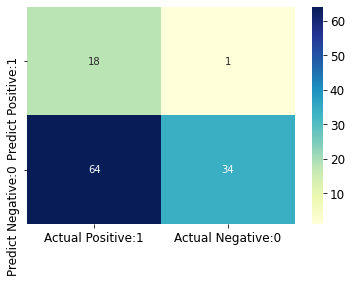

In [115]:
# visualizing confusion matrix with seaborn heatmap

cm_map2 = pd.DataFrame(data=conf_mat2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_map2, annot=True, fmt='d', cmap='YlGnBu')

### Classification Metrices

In [116]:
# Printing classification report
print(classification_report(Y2_test, Y2_pred))

                precision    recall  f1-score   support

non vegetarian       0.22      0.95      0.36        19
    vegetarian       0.97      0.35      0.51        98

      accuracy                           0.44       117
     macro avg       0.60      0.65      0.43       117
  weighted avg       0.85      0.44      0.49       117



In [117]:
TP2 = conf_mat2[0,0]
TN2 = conf_mat2[1,1]
FP2 = conf_mat2[0,1]
FN2 = conf_mat2[1,0]

In [118]:
# printing success rate

success_rate2 = (TP2 + TN2) / float(TP2 + TN2 + FP2 + FN2)

print('Success rate : {0:0.4f}'.format(success_rate2))

Success rate : 0.4444


In [119]:
# printing error rate

error_rate2 = (FP2 + FN2) / float(TP2 + TN2 + FP2 + FN2)

print('Error rate : {0:0.4f}'.format(error_rate2))

Error rate : 0.5556


In [120]:
# Calculating True Positive Rate
tp_rate2 = TP2 / float(TP2 + FN2)
print('True Positive Rate : {0:0.4f}'.format(tp_rate2))

True Positive Rate : 0.2195


In [121]:
# Calculating False Positive Rate
fp_rate2 = FP2 / float(FP2 + TN2)
print('False Positive Rate : {0:0.4f}'.format(fp_rate2))

False Positive Rate : 0.0286


In [122]:
# printing precision score

prec2 = TP2 / float(TP2 + FP2)
print('Precision : {0:0.4f}'.format(prec2))

Precision : 0.9474


In [123]:
# printing recall score

recall2 = TP2 / float(TP2 + FN2)

print('Recall : {0:0.4f}'.format(recall2))

Recall : 0.2195


In [124]:
# Printing specificity

specificity2 = TN2 / (TN2 + FP2)

print('Specificity : {0:0.4f}'.format(specificity2))

Specificity : 0.9714


In [125]:
# printing F measure

f_measure2 = (2*recall2*prec2)/float(recall2+prec2)
print('F measure : {0:0.4f}'.format(f_measure2))

F measure : 0.3564


### Conclusion
##### 1. A Gaussian Naïve Bayes Classifier model was built to predict whether a particular Indian food was vegetarian or non vegetarian .
##### 2. The accuracy of the model was 0.4444, which indicates that the model does not do a good job of predicting the class labels.
##### 3. The training-set accuracy score is 0.4222 while the test-set accuracy to be 0.4444. These two values are quite comparable. So, there is no sign of overfitting or underfitting.
##### 4. The null accuracy score is 0.8376. So, we can conclude that our Gaussian Naïve Bayes classifier model is not doing a good job in predicting the class labels.
##### 5. The confusion matrix shows 52 correct predictions and 65 incorrect predictions.
##### 6. The error rate is 0. 5556 and the success rate is 0.4444

# Running Naive Bayes Classifier for Dataset 3 

In [126]:
X3 = food3.drop(['diet'], axis=1)
# X3 will contain all the input features of food3
X3.head()

,Flavor_sweet,Course_dessert,Course_snack,Course_side dish,Course_starter,Flavor_spicy,Course_main course,cook_time
0,1,1,0,0,0,0,0,25.0
1,1,1,0,0,0,0,0,30.0
2,1,1,0,0,0,0,0,60.0
3,1,1,0,0,0,0,0,30.0
4,1,1,0,0,0,0,0,40.0


In [127]:
Y3 = food3['diet']
# Y3 will contain the class attribute 'diet'
Y3.head()

0    vegetarian
1    vegetarian
2    vegetarian
3    vegetarian
4    vegetarian
Name: diet, dtype: object

### Splitting data into separate training and test set

In [128]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.30, random_state = 0)

In [129]:
X3_train.shape, X3_test.shape

((270, 8), (117, 8))

In [130]:
X3_train.dtypes

Flavor_sweet            uint8
Course_dessert          uint8
Course_snack            uint8
Course_side dish        uint8
Course_starter          uint8
Flavor_spicy            uint8
Course_main course      uint8
cook_time             float64
dtype: object

In [131]:
X3_train.head()

,Flavor_sweet,Course_dessert,Course_snack,Course_side dish,Course_starter,Flavor_spicy,Course_main course,cook_time
66,1,1,0,0,0,0,0,45.0
218,1,1,0,0,0,0,0,40.0
153,0,0,0,0,0,1,1,35.0
12,1,1,0,0,0,0,0,30.0
101,0,0,0,0,0,1,1,30.0


In [132]:
X3_test.head()

,Flavor_sweet,Course_dessert,Course_snack,Course_side dish,Course_starter,Flavor_spicy,Course_main course,cook_time
54,1,1,0,0,0,0,0,15.0
124,0,0,0,0,0,1,1,45.0
312,0,0,0,0,0,0,1,30.0
175,0,0,0,0,0,0,1,30.0
281,1,1,0,0,0,0,0,15.0


### Feature scaling

###### All feature variables must be mapped onto the same scale before training the Naive Bayes Classifier on them

In [133]:
cols3 = X3_train.columns

In [134]:
scaler3 = RobustScaler()

X3_train = scaler3.fit_transform(X3_train)

X3_test = scaler3.transform(X3_test)

X3_train = pd.DataFrame(X3_train,columns=[cols3])

X3_test = pd.DataFrame(X3_test,columns=[cols3])

In [135]:
X3_train.head()

,Flavor_sweet,Course_dessert,Course_snack,Course_side dish,Course_starter,Flavor_spicy,Course_main course,cook_time
0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.75
1,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.50
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.25
3,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00


In [136]:
X3_test.head()

,Flavor_sweet,Course_dessert,Course_snack,Course_side dish,Course_starter,Flavor_spicy,Course_main course,cook_time
0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,-0.75
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75
2,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.00
3,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.00
4,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,-0.75


### Model training

In [137]:
# training a Gaussian Naive Bayes classifier on the training set
# instantiating the model
GNB3 = GaussianNB()
# fitting the model
GNB3.fit(X3_train, Y3_train)

GaussianNB()

### Predicting the results

In [138]:
Y3_pred = GNB3.predict(X3_test)

Y3_pred

array(['vegetarian', 'non vegetarian', 'non vegetarian', 'non vegetarian',
       'vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian', 'vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'vegetarian',
       'non vegetarian', 'vegetarian', 'non vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian', 'vegetarian',
       'non vegetarian', 'non vegetarian', 'non vegetarian', 'vegetarian',
       'vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'non vegetarian',
       'non vegetarian', 'non vegetarian', 'vegetarian', 'non vegetarian',
       'vegetarian', 'vegetarian', 'non vegetarian', 'vegetaria

### Checking accuracy score

In [139]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y3_test, Y3_pred)))

Model accuracy score: 0.4701


In [140]:
# printing the scores on training and test set to check for overfitting and underfitting

print('Training set score: {:.4f}'.format(GNB3.score(X3_train, Y3_train)))

print('Test set score: {:.4f}'.format(GNB3.score(X3_test, Y3_test)))

Training set score: 0.4593
Test set score: 0.4701


###### Both values are quite comparable, so there are no signs of overfitting or underfitting

In [141]:
# checking class distribution in test set

Y3_test.value_counts()

vegetarian        98
non vegetarian    19
Name: diet, dtype: int64

In [142]:
# checking null accuracy score to compare with model accuracy score

null_accuracy3 = (98/(98+19))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy3))

Null accuracy score: 0.8376


###### The model accuracy score is 0.4701 but null accuracy score is 0.8376. So, we can conclude that our Gaussian Naive Bayes Classification model is not doing a good job in predicting the class labels.

### Confusion Matrix

In [143]:
# Printing the Confusion Matrix and slice it into four pieces

conf_mat3 = confusion_matrix(Y3_test, Y3_pred)

print('Confusion matrix\n\n', conf_mat3)

print('\nTrue Positives(TP) = ', conf_mat3[0,0])

print('\nTrue Negatives(TN) = ', conf_mat3[1,1])

print('\nFalse Positives(FP) = ', conf_mat3[0,1])

print('\nFalse Negatives(FN) = ', conf_mat3[1,0])

Confusion matrix

 [[18  1]
 [61 37]]

True Positives(TP) =  18

True Negatives(TN) =  37

False Positives(FP) =  1

False Negatives(FN) =  61


###### The confusion matrix shows 18 + 37 = 55 correct predictions and 1 + 61 = 62 incorrect predictions.

<AxesSubplot:>

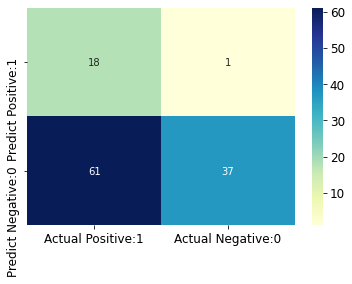

In [144]:
# visualizing confusion matrix with seaborn heatmap

cm_map3 = pd.DataFrame(data=conf_mat3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_map3, annot=True, fmt='d', cmap='YlGnBu')

### Classification Metrices

In [145]:
# Printing classification report
print(classification_report(Y3_test, Y3_pred))

                precision    recall  f1-score   support

non vegetarian       0.23      0.95      0.37        19
    vegetarian       0.97      0.38      0.54        98

      accuracy                           0.47       117
     macro avg       0.60      0.66      0.46       117
  weighted avg       0.85      0.47      0.52       117



In [146]:
TP3 = conf_mat3[0,0]
TN3 = conf_mat3[1,1]
FP3 = conf_mat3[0,1]
FN3 = conf_mat3[1,0]

In [147]:
# printing success rate

success_rate3 = (TP3 + TN3) / float(TP3 + TN3 + FP3 + FN3)

print('Success rate : {0:0.4f}'.format(success_rate3))

Success rate : 0.4701


In [148]:
# printing error rate

error_rate3 = (FP3 + FN3) / float(TP3 + TN3 + FP3 + FN3)

print('Error rate : {0:0.4f}'.format(error_rate3))

Error rate : 0.5299


In [149]:
# Calculating True Positive Rate
tp_rate3 = TP3 / float(TP3 + FN3)
print('True Positive Rate : {0:0.4f}'.format(tp_rate3))

True Positive Rate : 0.2278


In [150]:
# Calculating False Positive Rate
fp_rate3 = FP3 / float(FP3 + TN3)
print('False Positive Rate : {0:0.4f}'.format(fp_rate3))

False Positive Rate : 0.0263


In [151]:
# printing precision score

prec3 = TP3 / float(TP3 + FP3)
print('Precision : {0:0.4f}'.format(prec3))

Precision : 0.9474


In [152]:
# printing recall score

recall3 = TP3 / float(TP3 + FN3)

print('Recall : {0:0.4f}'.format(recall3))

Recall : 0.2278


In [153]:
# Printing specificity

specificity3 = TN3 / (TN3 + FP3)

print('Specificity : {0:0.4f}'.format(specificity3))

Specificity : 0.9737


In [154]:
# printing F measure

f_measure3 = (2*recall3*prec3)/float(recall3+prec3)
print('F measure : {0:0.4f}'.format(f_measure3))

F measure : 0.3673


### Conclusion
##### 1. A Gaussian Naïve Bayes Classifier model was built to predict whether a particular Indian food was vegetarian or non vegetarian .
##### 2. The accuracy of the model was 0.4701, which indicates that the model does not do a good job of predicting the class labels.
##### 3. The training-set accuracy score is 0.4593 while the test-set accuracy to be 0.4701. These two values are quite comparable. So, there is no sign of overfitting or underfitting.
##### 4. The null accuracy score is 0.8376. So, we can conclude that our Gaussian Naïve Bayes classifier model is not doing a good job in predicting the class labels.
##### 5. The confusion matrix shows 55 correct predictions and 62 incorrect predictions.
##### 6. The error rate is 0. 5299 and the success rate is 0.4701

#           CW PART 2 - CLUSTERING

In [155]:
X_new = X[['prep_time','cook_time']]
# prep_time and cook_time are the only continuous attributes of the dataset
X_new.head()

,prep_time,cook_time
0,45.0,25.0
1,80.0,30.0
2,15.0,60.0
3,15.0,30.0
4,15.0,40.0


In [156]:
def plot_clusters(X, y=None):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=5)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

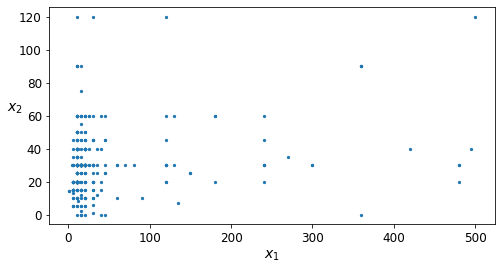

In [157]:
plt.figure(figsize=(8, 4))
plot_clusters(X_new)
plt.show()
# plotting the instances of the dataset based on the given attributes

### Fit and Predict

###### A K-Means clusterer is trained on the dataset. It will try to find cluster centers and assign each instance to the closest cluster.

In [158]:
from sklearn.cluster import KMeans

In [159]:
k = 2 # number of clusters 
kmeans = KMeans(n_clusters=k, random_state=42)
y_predict = kmeans.fit_predict(X_new) #Compute cluster centers and predict cluster index for each sample.

In [160]:
# the predicted cluster index of each instance in the dataset
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

###### Each instance was assigned to one of the two clusters. In the context of clustering, an instance’s label is the index of the cluster that this instance gets assigned to by the algorithm.

In [161]:
y_predict is kmeans.labels_

True

In [162]:
# the centriods of each cluster are estimated
kmeans.cluster_centers_

array([[ 20.4630137 ,  29.88767123],
       [324.77272727,  45.45454545]])

In [163]:
# the label of an instance is the index of the cluster that instance gets assigned to
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

### Decision Boundaries

###### The model's decision boundaries are plotted. A Voronoi diagram is produced

In [164]:
def plot_data(X):
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2) 

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=5, linewidths=15,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

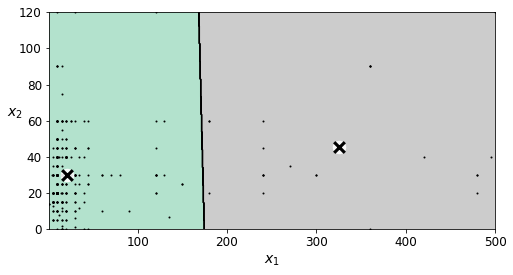

In [165]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_new)
plt.show()
# plotting the decision boundary that separates the instance into their respective clusters
# the mark shows the coordinates of the centriods of each cluster

### Soft Clustering

###### Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering.

In [166]:
kmeans.transform(X_new) # Transforms X_new to a cluster-distance space.

array([[2.50190533e+01, 2.80519460e+02],
       [5.95370923e+01, 2.45260129e+02],
       [3.06038701e+01, 3.10114032e+02],
       [5.46416841e+00, 3.10158001e+02],
       [1.14936379e+01, 3.09820746e+02],
       [2.26711364e+01, 3.14805545e+02],
       [2.26711364e+01, 3.14805545e+02],
       [1.43958570e+01, 3.15800259e+02],
       [4.76444579e-01, 3.05164314e+02],
       [1.45510772e+01, 3.14819983e+02],
       [1.45510772e+01, 3.14819983e+02],
       [2.93001872e+01, 3.22321528e+02],
       [4.76444579e-01, 3.05164314e+02],
       [1.04636167e+01, 3.15151888e+02],
       [1.37375453e+01, 2.95869726e+02],
       [1.83808905e+01, 3.14773055e+02],
       [1.15483326e+01, 3.15436615e+02],
       [1.43958570e+01, 3.15800259e+02],
       [3.18783155e+01, 3.15108616e+02],
       [3.06038701e+01, 3.10114032e+02],
       [2.26711364e+01, 3.14805545e+02],
       [3.06038701e+01, 3.10114032e+02],
       [1.83808905e+01, 3.14773055e+02],
       [3.58949325e+01, 2.85143957e+02],
       [3.045220

In [167]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.50190533e+01, 2.80519460e+02],
       [5.95370923e+01, 2.45260129e+02],
       [3.06038701e+01, 3.10114032e+02],
       [5.46416841e+00, 3.10158001e+02],
       [1.14936379e+01, 3.09820746e+02],
       [2.26711364e+01, 3.14805545e+02],
       [2.26711364e+01, 3.14805545e+02],
       [1.43958570e+01, 3.15800259e+02],
       [4.76444579e-01, 3.05164314e+02],
       [1.45510772e+01, 3.14819983e+02],
       [1.45510772e+01, 3.14819983e+02],
       [2.93001872e+01, 3.22321528e+02],
       [4.76444579e-01, 3.05164314e+02],
       [1.04636167e+01, 3.15151888e+02],
       [1.37375453e+01, 2.95869726e+02],
       [1.83808905e+01, 3.14773055e+02],
       [1.15483326e+01, 3.15436615e+02],
       [1.43958570e+01, 3.15800259e+02],
       [3.18783155e+01, 3.15108616e+02],
       [3.06038701e+01, 3.10114032e+02],
       [2.26711364e+01, 3.14805545e+02],
       [3.06038701e+01, 3.10114032e+02],
       [1.83808905e+01, 3.14773055e+02],
       [3.58949325e+01, 2.85143957e+02],
       [3.045220

### K-Means Algorithm

###### The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
###### * First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
###### * Repeat until convergence (i.e., until the centroids stop moving):
######     * Assign each instance to the closest centroid.
######     * Update the centroids to be the mean of the instances that are assigned to them.

In [168]:
# The K-Means algorithm is run for 1,2 and 3 iterations, to see how the centroids move around
kmeans_iter1 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X_new)
kmeans_iter2.fit(X_new)
kmeans_iter3.fit(X_new)

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=2, n_init=1,
       random_state=1)

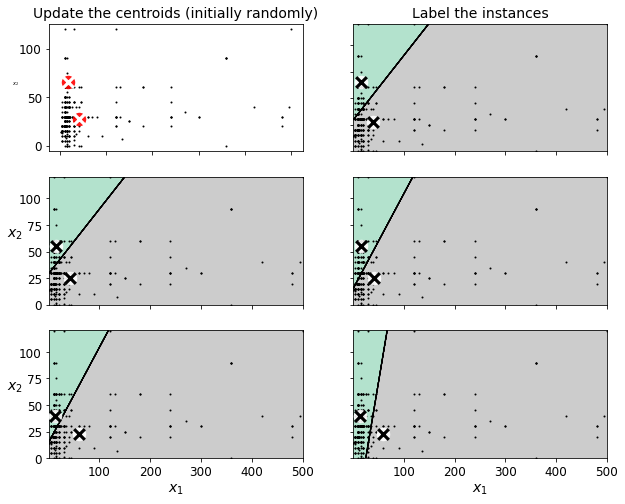

In [169]:
# plotting graphs for each set of iterations
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_new)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=5, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X_new, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X_new, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X_new, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X_new, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X_new, show_ylabels=False)

plt.show()

### Inertia

###### To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the inertia metric. Inertia is the sum of the squared distances between each training instance and its closest centroid

In [170]:
kmeans.inertia_

592016.4633872984

In [171]:
X_dist = kmeans.transform(X_new)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

592016.4633872975

###### The score() method returns the negative inertia. Why negative? Well, it is because a predictor's score() method must always respect the "great is better" rule.

In [172]:
kmeans.score(X_new)

-592016.4633872984

### Finding the optimal number of clusters 

###### What if the number of clusters was set to a value greater than 2?

In [173]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

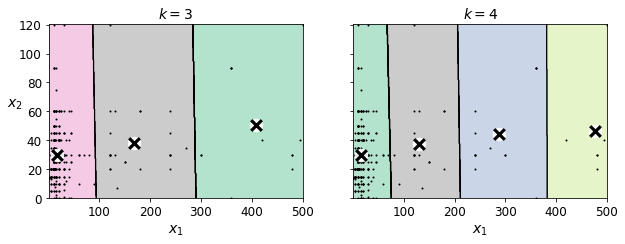

In [174]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k4 = KMeans(n_clusters=4, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k4, X_new, "$k=3$", "$k=4$")
plt.show()

In [175]:
kmeans_k3.inertia_

299492.3493589749

In [176]:
kmeans_k4.inertia_

212378.3690958164

###### We cannot simply take the value of 𝑘 that minimizes the inertia, since it keeps getting lower as we increase 𝑘 . Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of 𝑘 and analyze the resulting curve (Elbow method):

In [177]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_new)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


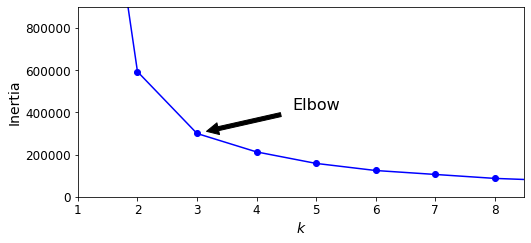

In [178]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 900000])
plt.show()

###### As you can see, there is an elbow at  𝑘=3 , which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So  𝑘=3  is a pretty good choice. However, it might not be the perfect choice since this value of 𝑘 minimizes the inertia.

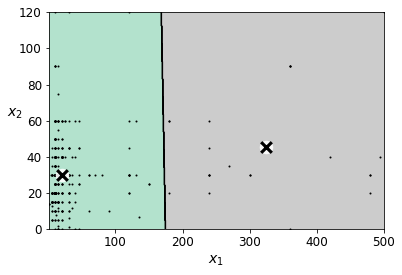

In [179]:
plot_decision_boundaries(kmeans_per_k[2-1], X_new)
plt.show()

### Selecting number of clusters using Silhouette plots

For n_clusters = 2 The average silhouette_score is : 0.8751270374463561
For n_clusters = 3 The average silhouette_score is : 0.8174849002801842
For n_clusters = 4 The average silhouette_score is : 0.7856798192724709
For n_clusters = 5 The average silhouette_score is : 0.4837668937290536
For n_clusters = 6 The average silhouette_score is : 0.4863705906496127


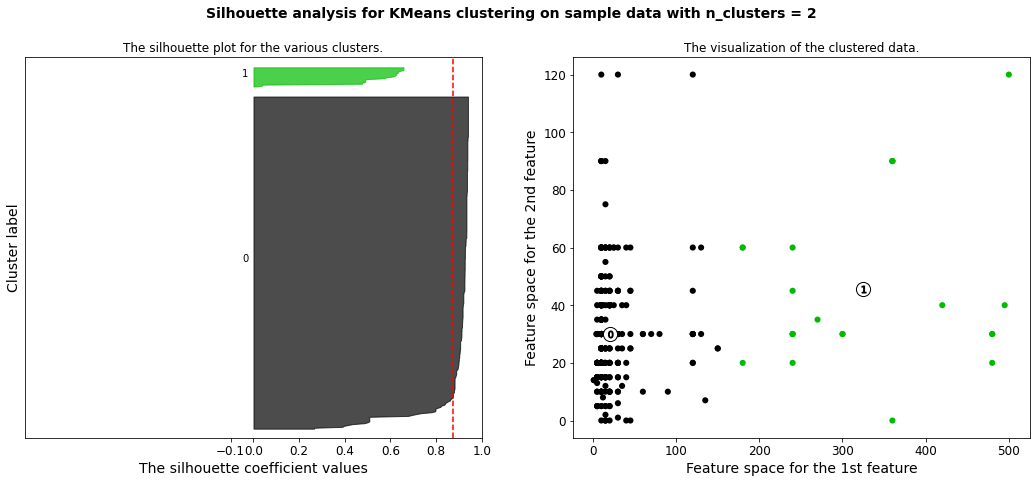

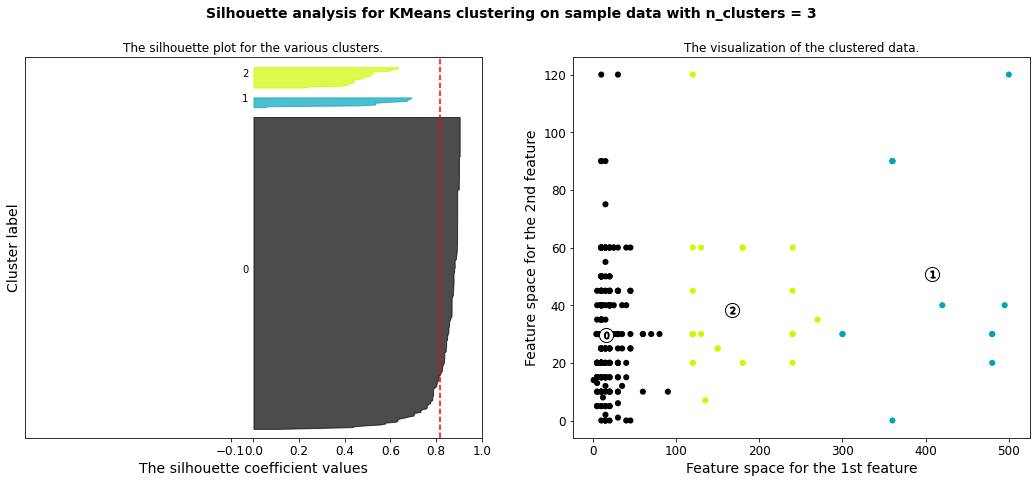

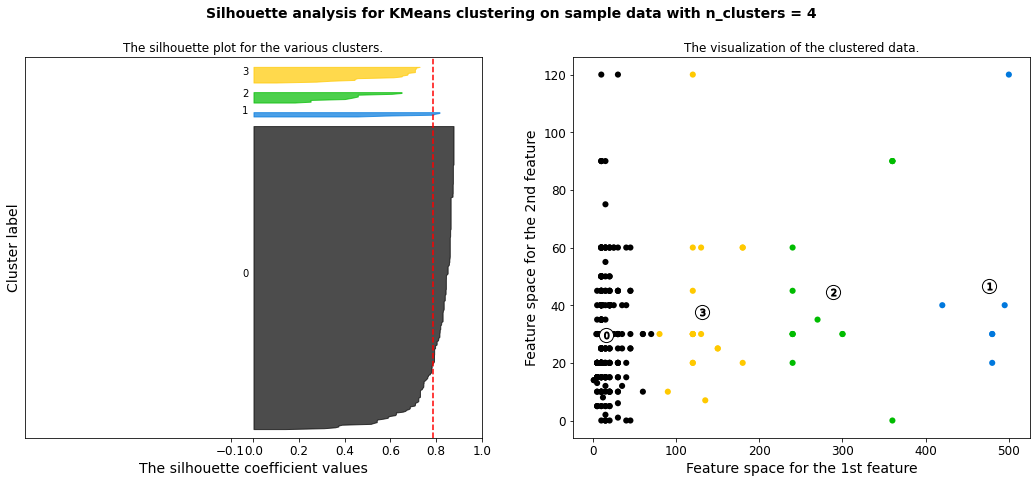

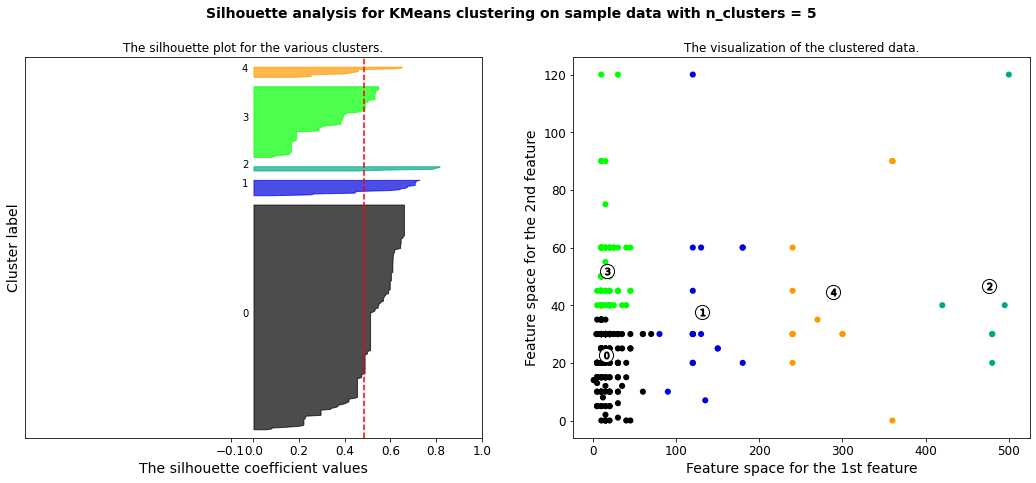

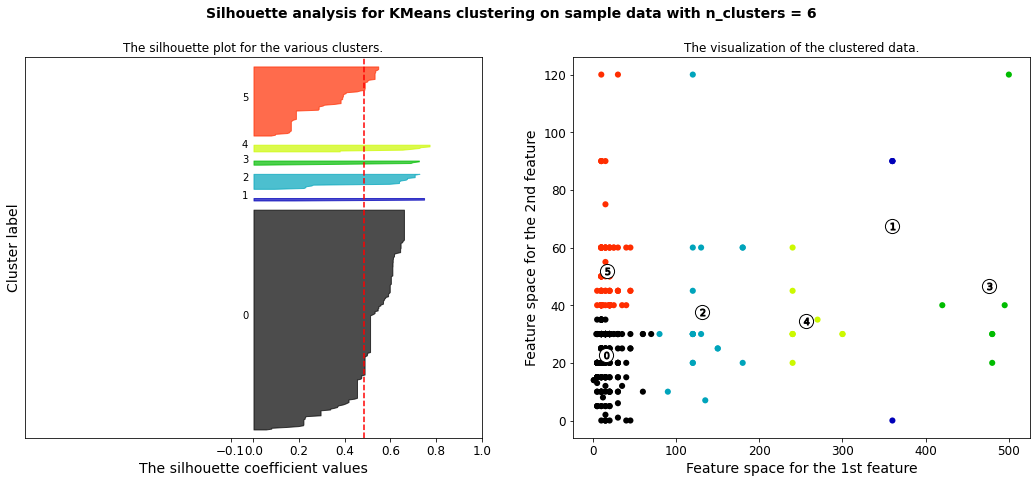

In [180]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_new) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_new)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_new, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_new, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_new.iloc[:, 0], X_new.iloc[:, 1], marker='.', s=150, lw=0, alpha=1,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

###### When comparing the average silhouette scores for the given number of clusters (from 2 to 6), it is observed that the score is the highest when the number of clusters is 2. This implies that the instances are well matched to their own clusters and poorly matched to other clusters when the number of clusters is 2. Therefore, 𝑘=2 is a pretty good choice according to the Silhouette method.

### GMM(Gaussian Mixture Model) Clustering 

###### Gaussian mixture models can also be used to cluster unlabeled data just like  K-Means.

###### K-Means performs hard classification whereas GMM performs soft classification. In K-Means, an instance is assigned to one and only one cluster, although there may be overlapping between the clusters. GMM provides the probability of an instance belonging to each of the possible clusters.

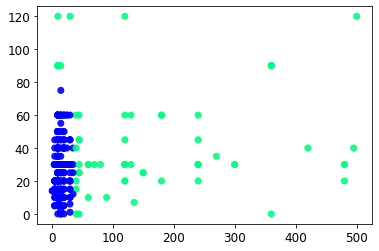

In [181]:
from sklearn.mixture import GaussianMixture
g = GaussianMixture(n_components=2)
g.fit(X_new)

plt.scatter(X_new['prep_time'], X_new['cook_time'],  
           c = g.fit_predict(X_new), cmap =plt.cm.winter, alpha = 0.9) 
plt.show()

In [182]:
# Predictions from GMM
labels = g.predict(X_new)
labels

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,

#           CW PART 3 - SUPERVISED LEARNING: GENERALISATION AND OVERFITTING             (DECISION TREES)

## Training and visualizing

In [183]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [184]:
X_train.head() 

,prep_time,cook_time,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter
0,22.5,0.75,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.3,0.50,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.5,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.5,0.00,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [185]:
Y_train.head() 

66     vegetarian
218    vegetarian
153    vegetarian
12     vegetarian
101    vegetarian
Name: diet, dtype: object

In [186]:
X_test.head() 

,prep_time,cook_time,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter
0,2.5,-0.75,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.5,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10.5,0.00,0.0,0.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.5,0.00,0.0,0.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.0,-0.75,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [187]:
Y_test.head()

54     vegetarian
124    vegetarian
312    vegetarian
175    vegetarian
281    vegetarian
Name: diet, dtype: object

In [188]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) # A decision tree classifier with maximum depth 2 is created 
tree_clf.fit(X_train, Y_train) # using decision tree classifier on the training set

DecisionTreeClassifier(max_depth=2, random_state=42)

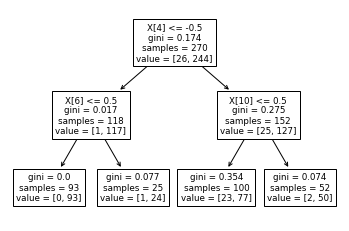

In [189]:
plot_tree(tree_clf); # plotting the decision tree

###### A node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.

## Predicting classes and class probabilities

In [190]:
pred_y = tree_clf.predict(X_test) # predicted classes by Decision Tree Classifier for test set instances
pred_y

array(['vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'veget

In [191]:
tree_clf.predict_proba(X_test) 
# predicted probabilities of belonging to each class by Decision Tree Classifier for test set instances

array([[0.        , 1.        ],
       [0.23      , 0.77      ],
       [0.04      , 0.96      ],
       [0.04      , 0.96      ],
       [0.        , 1.        ],
       [0.03846154, 0.96153846],
       [0.        , 1.        ],
       [0.04      , 0.96      ],
       [0.23      , 0.77      ],
       [0.23      , 0.77      ],
       [0.23      , 0.77      ],
       [0.        , 1.        ],
       [0.23      , 0.77      ],
       [0.03846154, 0.96153846],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.23      , 0.77      ],
       [0.23      , 0.77      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.03846154, 0.96153846],
       [0.        , 1.        ],
       [0.23      , 0.77      ],
       [0.23      , 0.77      ],
       [0.04      , 0.96      ],
       [0.04      , 0.96      ],
       [0.23      , 0.77      ],
       [0.23      , 0.77      ],
       [0.03846154, 0.96153846],
       [0.04      , 0.96      ],
       [0.

## Checking for overfitting and underfitting

In [192]:
# printing the scores on training and test sets to check for overfitting and underfitting

print('Training set score: {:.4f}'.format(tree_clf.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(tree_clf.score(X_test, Y_test)))

Training set score: 0.9037
Test set score: 0.8376


###### Both values are quite comparable, so there seems to be no overfitting or underfitting

## Accuracy of training set

In [193]:
pred_Y = tree_clf.predict(X_train) # predicted classes by Decision Tree Classifier for training set instances
pred_Y

array(['vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'veget

In [194]:
# Testing the classifier's accuracy on the training set
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, pred_Y)))

Model accuracy score: 0.9037


## Testing the classifier using 10-fold cross-validation

In [195]:
# applying 10-fold cross validation

from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(tree_clf, X_train, Y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(cross_val_scores))

Cross-validation scores:[0.96296296 0.92592593 0.92592593 0.92592593 0.92592593 0.88888889
 0.88888889 0.88888889 0.85185185 0.88888889]


In [196]:
# computing average cross-validation score

print('Average cross-validation score: {:.4f}'.format(cross_val_scores.mean()))

Average cross-validation score: 0.9074


## Testing the classifier using test set

### Checking accuracy score 

In [197]:
# Testing the classifier's accuracy on the test set
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, pred_y)))

Model accuracy score: 0.8376


In [198]:
# checking class distribution in test set

Y_test.value_counts()

vegetarian        98
non vegetarian    19
Name: diet, dtype: int64

In [199]:
# checking null accuracy score to compare with model accuracy score
# Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
null_accuracy = (98/(98+19))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8376


###### The model accuracy score is 0.8376 and the null accuracy score is 0.8376. So, we can conclude that our Decision Tree Classifier model is  doing quite a good job in predicting the class labels.

### Confusion Matrix

In [200]:
# Print the Confusion Matrix and slice it into four pieces

conf_matrix = confusion_matrix(Y_test, pred_y)

print('Confusion matrix\n\n', conf_matrix)

print('\nTrue Positives(tp) = ', conf_matrix[0,0])

print('\nTrue Negatives(tn) = ', conf_matrix[1,1])

print('\nFalse Positives(fp) = ', conf_matrix[0,1])

print('\nFalse Negatives(fn) = ', conf_matrix[1,0])

Confusion matrix

 [[ 0 19]
 [ 0 98]]

True Positives(tp) =  0

True Negatives(tn) =  98

False Positives(fp) =  19

False Negatives(fn) =  0


###### The confusion matrix shows 98 correct predictions and 19 incorrect predictions.

<AxesSubplot:>

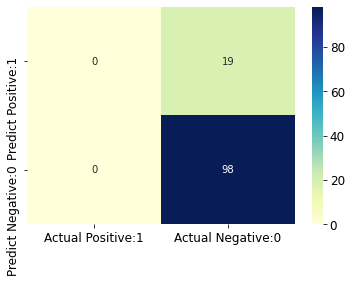

In [201]:
# visualizing confusion matrix with seaborn heatmap

conf_matrix_map = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix_map, annot=True, fmt='d', cmap='YlGnBu')

### Classification Metrices

In [202]:
# Printing classification report
print(classification_report(Y_test, pred_y))

                precision    recall  f1-score   support

non vegetarian       0.00      0.00      0.00        19
    vegetarian       0.84      1.00      0.91        98

      accuracy                           0.84       117
     macro avg       0.42      0.50      0.46       117
  weighted avg       0.70      0.84      0.76       117



C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:
tp = conf_matrix[0,0]
tn = conf_matrix[1,1]
fp = conf_matrix[0,1]
fn = conf_matrix[1,0]

In [204]:
# printing success rate

succ_rate = (tp + tn) / float(tp + tn + fp + fn)

print('Success rate : {0:0.4f}'.format(succ_rate))

Success rate : 0.8376


In [205]:
# printing error rate

err_rate = (fp + fn) / float(tp + tn + fp + fn)

print('Error rate : {0:0.4f}'.format(err_rate))

Error rate : 0.1624


In [206]:
# Calculating True Positive Rate
TP_rate = tp / float(tp + fn) # tp is zero
print('True Positive Rate : {0:0.4f}'.format(TP_rate))

True Positive Rate : nan


<ipython-input-206-e612126eb68e>:2: RuntimeWarning: invalid value encountered in true_divide
  TP_rate = tp / float(tp + fn) # tp is zero


In [207]:
# Calculating False Positive Rate
FP_rate = fp / float(fp + tn)
print('False Positive Rate : {0:0.4f}'.format(FP_rate))

False Positive Rate : 0.1624


In [208]:
# printing precision score

precision = tp / float(tp + fp)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.0000


In [209]:
# printing recall score

rec = tp / float(tp + fn)

print('Recall : {0:0.4f}'.format(rec))

Recall : nan


<ipython-input-209-077a07addc60>:3: RuntimeWarning: invalid value encountered in true_divide
  rec = tp / float(tp + fn)


In [210]:
# Printing specificity

spec = tn / (tn + fp)

print('Specificity : {0:0.4f}'.format(spec))

Specificity : 0.8376


In [211]:
# printing F measure

F_measure = (2*rec*precision)/float(rec+precision)
print('F measure : {0:0.4f}'.format(F_measure))

F measure : nan


## Experimenting with various Decision Tree parameters

In [212]:
# encoding categorical data with numerical values
Y_test_coded = Y_test.replace(["vegetarian","non vegetarian"],[0,1])
Y_test_coded.head()

54     0
124    0
312    0
175    0
281    0
Name: diet, dtype: int64

In [213]:
# encoding categorical data with numerical values
pred_y_coded = np.where(pred_y == "vegetarian", 0, 1)
pred_y_coded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

For tree depth 2:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For tree depth 3:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For tree depth 4:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For tree depth 5:
Training set accuracy: 0.9111111111111111
Test set accuracy: 0.8632478632478633
For tree depth 6:
Training set accuracy: 0.9296296296296296
Test set accuracy: 0.8547008547008547
For tree depth 7:
Training set accuracy: 0.937037037037037
Test set accuracy: 0.8547008547008547
For tree depth 8:
Training set accuracy: 0.9407407407407408
Test set accuracy: 0.8803418803418803


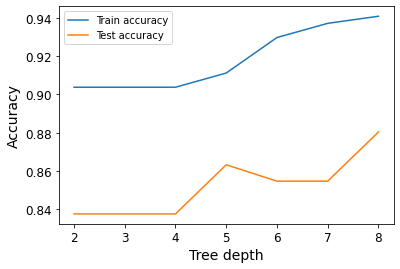

In [214]:
# Experimenting with different tree depths and measuring accuracy for each tree
results_train = []
results_test = []
max_depth = [2,3,4,5,6,7,8]
for m in max_depth:
    d = DecisionTreeClassifier(max_depth=m)
    d.fit(X_train, Y_train)
    pred_train = d.predict(X_train)
    s = accuracy_score(Y_train, pred_train)
    results_train.append(s)
    pred_test = d.predict(X_test)
    s1 = accuracy_score(Y_test, pred_test)
    results_test.append(s1)
for i in range(7):
    print("For tree depth {}:".format(max_depth[i]))
    print("Training set accuracy: {}".format(results_train[i]))
    print("Test set accuracy: {}".format(results_test[i]))
#plotting a graph between tree depth vs model accuracy
plt.plot(max_depth,results_train,label="Train accuracy")
plt.plot(max_depth,results_test,label="Test accuracy")
plt.legend(loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

For minimum number of samples per leaf = 2:
Training set accuracy: 0.9185185185185185
Test set accuracy: 0.8632478632478633
For minimum number of samples per leaf = 3:
Training set accuracy: 0.9185185185185185
Test set accuracy: 0.8547008547008547
For minimum number of samples per leaf = 4:
Training set accuracy: 0.9148148148148149
Test set accuracy: 0.8717948717948718
For minimum number of samples per leaf = 5:
Training set accuracy: 0.9074074074074074
Test set accuracy: 0.8632478632478633
For minimum number of samples per leaf = 6:
Training set accuracy: 0.9074074074074074
Test set accuracy: 0.8632478632478633
For minimum number of samples per leaf = 7:
Training set accuracy: 0.9074074074074074
Test set accuracy: 0.8632478632478633
For minimum number of samples per leaf = 8:
Training set accuracy: 0.9074074074074074
Test set accuracy: 0.8632478632478633
For minimum number of samples per leaf = 9:
Training set accuracy: 0.9074074074074074
Test set accuracy: 0.8632478632478633
For mini

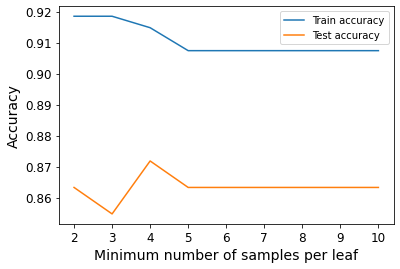

In [215]:
# Experimenting with different number of samples per leaf and measuring accuracy for each tree
results_train = []
results_test = []
min_samples_leaf = [2,3,4,5,6,7,8,9,10]
for m in min_samples_leaf:
    d = DecisionTreeClassifier(min_samples_leaf=m)
    d.fit(X_train, Y_train)
    pred_train = d.predict(X_train)
    s = accuracy_score(Y_train, pred_train)
    results_train.append(s)
    pred_test = d.predict(X_test)
    s1 = accuracy_score(Y_test, pred_test)
    results_test.append(s1)
for i in range(9):
    print("For minimum number of samples per leaf = {}:".format(min_samples_leaf[i]))
    print("Training set accuracy: {}".format(results_train[i]))
    print("Test set accuracy: {}".format(results_test[i]))
plt.plot(min_samples_leaf,results_train,label="Train accuracy")
plt.plot(min_samples_leaf,results_test,label="Test accuracy")
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('Minimum number of samples per leaf')
plt.show()

In [216]:
# Experimenting with different criterion and measuring accuracy for each tree
d = DecisionTreeClassifier(criterion='gini')
d.fit(X_train, Y_train)
pred_train = d.predict(X_train)
print("Gini Impurity")
print("Accuracy of train set: {0:0.4f}".format(accuracy_score(Y_train, pred_train)))
pred_test = d.predict(X_test)
print("Accuracy of test set: {0:0.4f}".format(accuracy_score(Y_test, pred_test)))
d = DecisionTreeClassifier(criterion='entropy')
d.fit(X_train, Y_train)
pred_train = d.predict(X_train)
print("\nInformation Gain")
print("Accuracy of train set: {0:0.4f}".format(accuracy_score(Y_train, pred_train)))
pred_test = d.predict(X_test)
print("Accuracy of test set: {0:0.4f}".format(accuracy_score(Y_test, pred_test)))

Gini Impurity
Accuracy of train set: 0.9481
Accuracy of test set: 0.8718

Information Gain
Accuracy of train set: 0.9481
Accuracy of test set: 0.8547


## Making new training and test sets

### Training and visualising

In [217]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X_train, Y_train, test_size = 0.30, random_state = 0)
# A new training set and test set is created by moving 30% of the instances from the original training set to the new test set

In [218]:
X4_train.shape, X4_test.shape

((189, 12), (81, 12))

In [219]:
X4_train.head()

,prep_time,cook_time,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter
97,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
217,10.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
232,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
250,0.0,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21,-0.5,1.00,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [220]:
X4_test.head()

,prep_time,cook_time,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter
64,0.0,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
135,-0.5,0.00,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
153,34.5,-1.50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
189,0.0,0.00,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
253,10.5,-0.50,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [221]:
tree_clf1 = DecisionTreeClassifier(max_depth=2, random_state=42) # A decision tree classifier with maximum depth 2 is created 
tree_clf1.fit(X4_train, Y4_train) # using decision tree classifier on the training set

DecisionTreeClassifier(max_depth=2, random_state=42)

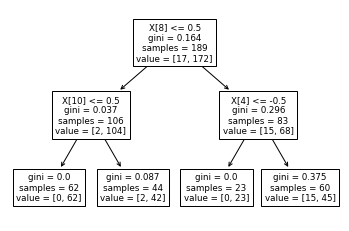

In [222]:
plot_tree(tree_clf1); # plotting the decision tree

###### A node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.

### Predicting classes and class probabilities

In [223]:
pred_y1 = tree_clf1.predict(X4_test) # predicted classes by Decision Tree Classifier for test set instances
pred_y1

array(['vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'veget

In [224]:
tree_clf1.predict_proba(X4_test)
# predicted probabilities of belonging to each class by Decision Tree Classifier for test set instances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.04545455, 0.95454545],
       [0.04545455, 0.95454545],
       [0.25      , 0.75      ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.04545455, 0.95454545],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.04545455, 0.95454545],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.04545455, 0.95454545],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.04545455, 0.95454545],
       [0.

### Checking for overfitting and underfitting 

In [225]:
# printing the scores on training and test sets to check for overfitting and underfitting

print('Training set score: {:.4f}'.format(tree_clf1.score(X4_train, Y4_train)))
print('Test set score: {:.4f}'.format(tree_clf1.score(X4_test, Y4_test)))

Training set score: 0.9101
Test set score: 0.8889


###### Both values are quite comparable, so there seems to be no overfitting or underfitting

### Accuracy of training set

In [226]:
pred_Y1 = tree_clf1.predict(X4_train) # predicted classes by Decision Tree Classifier for training set instances
pred_Y1

array(['vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'veget

In [227]:
# Testing the classifier's accuracy on the training set
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y4_train, pred_Y1)))

Model accuracy score: 0.9101


### Testing the classifier using test set

#### Checking accuracy score

In [228]:
# Testing the classifier's accuracy on the test set
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y4_test, pred_y1)))

Model accuracy score: 0.8889


In [229]:
# checking class distribution in test set

Y4_test.value_counts()

vegetarian        72
non vegetarian     9
Name: diet, dtype: int64

In [230]:
# checking null accuracy score to compare with model accuracy score
# Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
null_accuracy = (72/(72+9))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8889


###### The model accuracy score is 0.8889 and the null accuracy score is 0.8889. So, we can conclude that our Decision Tree Classifier model is  doing quite a good job in predicting the class labels.

### Training and visualising

In [231]:
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X_train, Y_train, test_size = 0.60, random_state = 0)
# A new training set and test set is created by moving 60% of the instances from the original training set to the new test set

In [232]:
X5_train.shape, X5_test.shape

((108, 12), (162, 12))

In [233]:
X5_train.head()

,prep_time,cook_time,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter
0,22.5,0.75,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
94,46.5,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95,-0.5,0.00,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
220,-0.5,-0.50,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
69,-0.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [234]:
X5_test.head()

,prep_time,cook_time,Flavor_bitter,Flavor_sour,Flavor_spicy,Flavor_sweet,Flavor_unknown,Course_dessert,Course_main course,Course_side dish,Course_snack,Course_starter
64,0.0,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
135,-0.5,0.00,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
153,34.5,-1.50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
189,0.0,0.00,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
253,10.5,-0.50,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [235]:
tree_clf2 = DecisionTreeClassifier(max_depth=2, random_state=42) # A decision tree classifier with maximum depth 2 is created 
tree_clf2.fit(X5_train, Y5_train) # using decision tree classifier on the training set

DecisionTreeClassifier(max_depth=2, random_state=42)

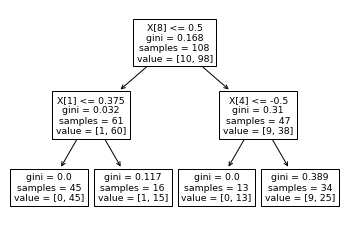

In [236]:
plot_tree(tree_clf2); # plotting the decision tree

###### A node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.

### Predicting classes and class probabilities

In [237]:
pred_y2 = tree_clf2.predict(X5_test) # predicted classes by Decision Tree Classifier for test set instances
pred_y2

array(['vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'veget

In [238]:
tree_clf2.predict_proba(X5_test)
# predicted probabilities of belonging to each class by Decision Tree Classifier for test set instances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.26470588, 0.73529412],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.26470588, 0.73529412],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.26470588, 0.73529412],
       [0.26470588, 0.73529412],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.26470588, 0.73529412],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.0625    , 0.9375    ],
       [0.26470588, 0.73529412],
       [0.26470588, 0.73529412],
       [0.        , 1.        ],
       [0.0625    , 0.9375    ],
       [0.26470588, 0.73529412],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

### Checking for overfitting and underfitting 

In [239]:
# printing the scores on training and test sets to check for overfitting and underfitting

print('Training set score: {:.4f}'.format(tree_clf2.score(X5_train, Y5_train)))
print('Test set score: {:.4f}'.format(tree_clf2.score(X5_test, Y5_test)))

Training set score: 0.9074
Test set score: 0.9012


###### Both values are quite comparable, so there seems to be no overfitting or underfitting

### Accuracy of training set

In [240]:
pred_Y2 = tree_clf2.predict(X5_train) # predicted classes by Decision Tree Classifier for training set instances
pred_Y2

array(['vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'veget

In [241]:
# Testing the classifier's accuracy on the training set
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y5_train, pred_Y2)))

Model accuracy score: 0.9074


### Testing the classifier using test set

#### Checking accuracy score

In [242]:
# Testing the classifier's accuracy on the test set
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y5_test, pred_y2)))

Model accuracy score: 0.9012


In [243]:
# checking class distribution in test set

Y5_test.value_counts()

vegetarian        146
non vegetarian     16
Name: diet, dtype: int64

In [244]:
# checking null accuracy score to compare with model accuracy score
# Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
null_accuracy = (146/(146+16))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9012


###### The model accuracy score is 0.9012 and the null accuracy score is 0.9012. So, we can conclude that our Decision Tree Classifier model is  doing quite a good job in predicting the class labels.

## Conclusions
###### 1. For the original training and test sets, Decision Tree Classifier gives accuracies of 0.9037 and 0.8376 respectively
###### 2. For the same training set, 10-fold cross-validation gives an average accuracy of 0.9074
###### 3. For the new training and test sets where 30% of the training instances were moved to the new test set,  Decision Tree Classifier gives accuracies of 0.9101 and 0.8889 respectively
###### 4. For the new training and test sets where 60% of the training instances were moved to the new test set,  Decision Tree Classifier gives accuracies of 0.9074 and 0.9012 respectively

#           CW PART 4 - NEURAL NETWORKS

## Linear Classifier - Logistic Regression

In [245]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
# training a Logistic Regression Classifier on the training set 
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

### Accuracy of training set

In [246]:
y_pred = log_reg.predict(X_train) # predicted classes by Logistic Regression for training set instances
y_pred

array(['vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'veget

In [247]:
# Testing the accuracy on the training set
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred)))

Model accuracy score: 0.9037


### Accuracy of training set using 10-fold cross-validation

In [248]:
# applying 10-fold cross validation

cross_validation_scores = cross_val_score(log_reg, X_train, Y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(cross_validation_scores))

Cross-validation scores:[0.92592593 0.92592593 0.92592593 0.92592593 0.88888889 0.88888889
 0.88888889 0.88888889 0.88888889 0.88888889]


In [249]:
# computing average cross-validation score

print('Average cross-validation score: {:.4f}'.format(cross_validation_scores.mean()))

Average cross-validation score: 0.9037


### Accuracy of test set

In [250]:
y_test_pred = log_reg.predict(X_test) # predicted classes by Logistic Regression for test set instances
y_test_pred

array(['vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'veget

In [251]:
# Testing the accuracy on the test set
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_test_pred)))

Model accuracy score: 0.8376


In [252]:
# checking class distribution in test set

Y_test.value_counts()

vegetarian        98
non vegetarian    19
Name: diet, dtype: int64

In [253]:
# checking null accuracy score to compare with model accuracy score
# Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
null_accuracy = (98/(98+19))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8376


###### The model accuracy score is 0.8376 and the null accuracy score is 0.8376. So, we can conclude that our Logistic Regression model is doing quite a good job in predicting the class labels.

### Checking for overfitting and underfitting 

In [254]:
# printing the scores on training and test sets to check for overfitting and underfitting

print('Training set score: {:.4f}'.format(log_reg.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(log_reg.score(X_test, Y_test)))

Training set score: 0.9037
Test set score: 0.8376


###### Both values are quite comparable, so there seems to be no overfitting or underfitting

## Multilayer Perceptron

In [255]:
from sklearn.neural_network import MLPClassifier

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multi

For learning rate = 0.001:
Training set accuracy: 0.9111111111111111
Test set accuracy: 0.8461538461538461
For learning rate = 0.002:
Training set accuracy: 0.9148148148148149
Test set accuracy: 0.8547008547008547
For learning rate = 0.003:
Training set accuracy: 0.9148148148148149
Test set accuracy: 0.8547008547008547
For learning rate = 0.004:
Training set accuracy: 0.9185185185185185
Test set accuracy: 0.8547008547008547
For learning rate = 0.005:
Training set accuracy: 0.9222222222222223
Test set accuracy: 0.8547008547008547
For learning rate = 0.006:
Training set accuracy: 0.9222222222222223
Test set accuracy: 0.8632478632478633
For learning rate = 0.007:
Training set accuracy: 0.9296296296296296
Test set accuracy: 0.8461538461538461
For learning rate = 0.008:
Training set accuracy: 0.9296296296296296
Test set accuracy: 0.8376068376068376
For learning rate = 0.009:
Training set accuracy: 0.9296296296296296
Test set accuracy: 0.8461538461538461


C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


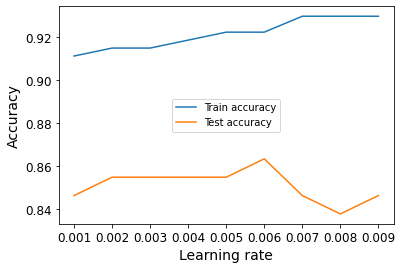

In [256]:
# Experimenting with different learning rates and measuring accuracy for each MLP
results_train = []
results_test = []
lr_list = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009]
for l in lr_list:
    mlp = MLPClassifier(random_state = 42,learning_rate_init=l)
    mlp.fit(X_train, Y_train)
    y_mlp_pred_train = mlp.predict(X_train)
    s = accuracy_score(Y_train, y_mlp_pred_train)
    results_train.append(s)
    y_mlp_pred_test = mlp.predict(X_test)
    s1 = accuracy_score(Y_test, y_mlp_pred_test)
    results_test.append(s1)
for i in range(9):
    print("For learning rate = {}:".format(lr_list[i]))
    print("Training set accuracy: {}".format(results_train[i]))
    print("Test set accuracy: {}".format(results_test[i]))
plt.plot(lr_list,results_train,label="Train accuracy")
plt.plot(lr_list,results_test,label="Test accuracy")
plt.legend(loc='center')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For activation function identity:
Training set accuracy: 0.9074074074074074
Test set accuracy: 0.8632478632478633
For activation function logistic:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For activation function tanh:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For activation function relu:
Training set accuracy: 0.9111111111111111
Test set accuracy: 0.8461538461538461


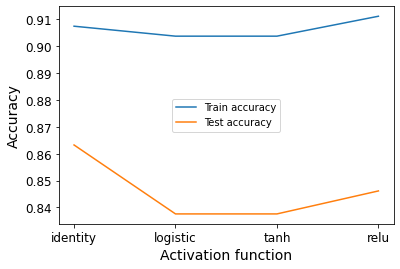

In [257]:
# Experimenting with different activation functions and measuring accuracy for each MLP
results_train = []
results_test = []
a_list = ['identity', 'logistic', 'tanh', 'relu']
for a in a_list:
    mlp = MLPClassifier(random_state = 42,activation=a)
    mlp.fit(X_train, Y_train)
    y_mlp_pred_train = mlp.predict(X_train)
    s = accuracy_score(Y_train, y_mlp_pred_train)
    results_train.append(s)
    y_mlp_pred_test = mlp.predict(X_test)
    s1 = accuracy_score(Y_test, y_mlp_pred_test)
    results_test.append(s1)
for i in range(4):
    print("For activation function {}:".format(a_list[i]))
    print("Training set accuracy: {}".format(results_train[i]))
    print("Test set accuracy: {}".format(results_test[i]))
plt.plot(a_list,results_train,label="Train accuracy")
plt.plot(a_list,results_test,label="Test accuracy")
plt.legend(loc='center')
plt.ylabel('Accuracy')
plt.xlabel('Activation function')
plt.show()

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For Number of hidden layers 1 and number of hidden nodes 500:
Training set accuracy: 0.9074074074074074
Test set accuracy: 0.8461538461538461
For Number of hidden layers 1 and number of hidden nodes 600:
Training set accuracy: 0.9111111111111111
Test set accuracy: 0.8461538461538461
For Number of hidden layers 2 and number of hidden nodes 900:
Training set accuracy: 0.937037037037037
Test set accuracy: 0.8461538461538461
For Number of hidden layers 2 and number of hidden nodes 1100:
Training set accuracy: 0.937037037037037
Test set accuracy: 0.8205128205128205
For Number of hidden layers 3 and number of hidden nodes 1200:
Training set accuracy: 0.937037037037037
Test set accuracy: 0.8717948717948718
For Number of hidden layers 3 and number of hidden nodes 1600:
Training set accuracy: 0.937037037037037
Test set accuracy: 0.8376068376068376
For Number of hidden layers 4 and number of hidden nodes 1900:
Training set accuracy: 0.9407407407407408
Test set accuracy: 0.8376068376068376
For Nu

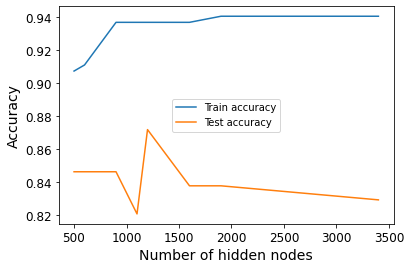

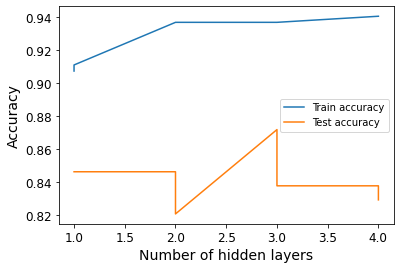

In [258]:
# Experimenting with different numbers and sizes of hidden layers and measuring accuracy for each MLP
results_train = []
results_test = []
hl_list=[]
hn_list=[]
hidden_layer_list = [(500,),(600,),(400,500),(100,1000),(500,300,400),(400,900,300),(200,600,800,300),(800,700,1000,900)]
for h in hidden_layer_list:
    mlp = MLPClassifier(random_state = 42,hidden_layer_sizes=h)
    mlp.fit(X_train, Y_train)
    y_mlp_pred_train = mlp.predict(X_train)
    s = accuracy_score(Y_train, y_mlp_pred_train)
    results_train.append(s)
    y_mlp_pred_test = mlp.predict(X_test)
    s1 = accuracy_score(Y_test, y_mlp_pred_test)
    results_test.append(s1)
    sum,count=0,0
    for k in h:
        sum+=k
        count+=1
    hn_list.append(sum)
    hl_list.append(count)
for i in range(8):
    print("For Number of hidden layers {} and number of hidden nodes {}:".format(hl_list[i],hn_list[i]))
    print("Training set accuracy: {}".format(results_train[i]))
    print("Test set accuracy: {}".format(results_test[i]))
plt.plot(hn_list,results_train,label="Train accuracy")
plt.plot(hn_list,results_test,label="Test accuracy")
plt.legend(loc='center')
plt.ylabel('Accuracy')
plt.xlabel('Number of hidden nodes')
plt.show()
plt.plot(hl_list,results_train,label="Train accuracy")
plt.plot(hl_list,results_test,label="Test accuracy")
plt.legend(loc='center right')
plt.ylabel('Accuracy')
plt.xlabel('Number of hidden layers')
plt.show()

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


For number of epochs 100:
Training set accuracy: 0.9074074074074074
Test set accuracy: 0.8376068376068376
For number of epochs 200:
Training set accuracy: 0.9111111111111111
Test set accuracy: 0.8461538461538461
For number of epochs 300:
Training set accuracy: 0.9111111111111111
Test set accuracy: 0.8461538461538461
For number of epochs 400:
Training set accuracy: 0.9111111111111111
Test set accuracy: 0.8461538461538461
For number of epochs 500:
Training set accuracy: 0.9148148148148149
Test set accuracy: 0.8547008547008547
For number of epochs 600:
Training set accuracy: 0.9148148148148149
Test set accuracy: 0.8547008547008547
For number of epochs 700:
Training set accuracy: 0.9148148148148149
Test set accuracy: 0.8547008547008547
For number of epochs 800:
Training set accuracy: 0.9148148148148149
Test set accuracy: 0.8547008547008547
For number of epochs 900:
Training set accuracy: 0.9148148148148149
Test set accuracy: 0.8547008547008547
For number of epochs 1000:
Training set accura

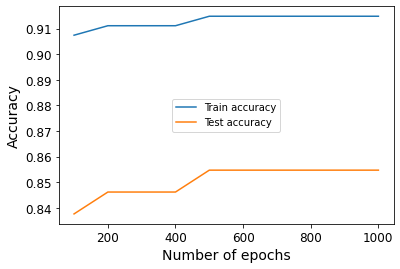

In [259]:
# Experimenting with different epochs and measuring accuracy for each MLP
results_train = []
results_test = []
epoch_list = [100,200,300,400,500,600,700,800,900,1000]
for e in epoch_list:
    mlp = MLPClassifier(random_state = 42,max_iter=e)
    mlp.fit(X_train, Y_train)
    y_mlp_pred_train = mlp.predict(X_train)
    s = accuracy_score(Y_train, y_mlp_pred_train)
    results_train.append(s)
    y_mlp_pred_test = mlp.predict(X_test)
    s1 = accuracy_score(Y_test, y_mlp_pred_test)
    results_test.append(s1)
for i in range(10):
    print("For number of epochs {}:".format(epoch_list[i]))
    print("Training set accuracy: {}".format(results_train[i]))
    print("Test set accuracy: {}".format(results_test[i]))
plt.plot(epoch_list,results_train,label="Train accuracy")
plt.plot(epoch_list,results_test,label="Test accuracy")
plt.legend(loc='center')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.show()

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multi

For momentum 0.1:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For momentum 0.2:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For momentum 0.3:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For momentum 0.4:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For momentum 0.5:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For momentum 0.6:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For momentum 0.7:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For momentum 0.8:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For momentum 0.9:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376


C:\Users\cathe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


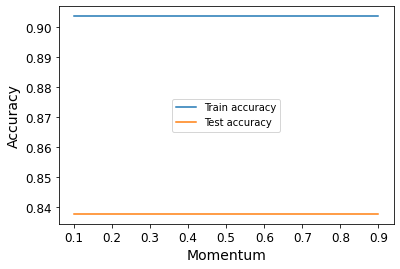

In [260]:
# Experimenting with different momentums and measuring accuracy for each MLP
results_train = []
results_test = []
m_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for m in m_list:
    mlp = MLPClassifier(random_state = 42,solver='sgd',momentum=m)
    mlp.fit(X_train, Y_train)
    y_mlp_pred_train = mlp.predict(X_train)
    s = accuracy_score(Y_train, y_mlp_pred_train)
    results_train.append(s)
    y_mlp_pred_test = mlp.predict(X_test)
    s1 = accuracy_score(Y_test, y_mlp_pred_test)
    results_test.append(s1)
for i in range(9):
    print("For momentum {}:".format(m_list[i]))
    print("Training set accuracy: {}".format(results_train[i]))
    print("Test set accuracy: {}".format(results_test[i]))
plt.plot(m_list,results_train,label="Train accuracy")
plt.plot(m_list,results_test,label="Test accuracy")
plt.legend(loc='center')
plt.ylabel('Accuracy')
plt.xlabel('Momentum')
plt.show()

For validation threshold 0.1:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For validation threshold 0.2:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For validation threshold 0.3:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For validation threshold 0.4:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8547008547008547
For validation threshold 0.5:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For validation threshold 0.6:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For validation threshold 0.7:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For validation threshold 0.8:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376
For validation threshold 0.9:
Training set accuracy: 0.9037037037037037
Test set accuracy: 0.8376068376068376


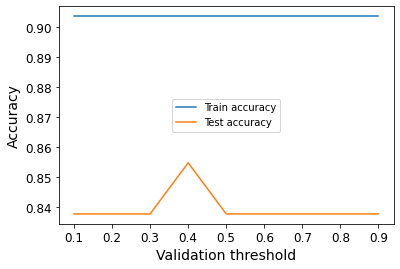

In [261]:
# Experimenting with different validation thresholds and measuring accuracy for each MLP
results_train = []
results_test = []
v_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for v in v_list:
    mlp = MLPClassifier(random_state = 42,early_stopping=True,validation_fraction=v)
    mlp.fit(X_train, Y_train)
    y_mlp_pred_train = mlp.predict(X_train)
    s = accuracy_score(Y_train, y_mlp_pred_train)
    results_train.append(s)
    y_mlp_pred_test = mlp.predict(X_test)
    s1 = accuracy_score(Y_test, y_mlp_pred_test)
    results_test.append(s1)
for i in range(9):
    print("For validation threshold {}:".format(v_list[i]))
    print("Training set accuracy: {}".format(results_train[i]))
    print("Test set accuracy: {}".format(results_test[i]))
plt.plot(v_list,results_train,label="Train accuracy")
plt.plot(v_list,results_test,label="Test accuracy")
plt.legend(loc='center')
plt.ylabel('Accuracy')
plt.xlabel('Validation threshold')
plt.show()

## Conclusions
###### 1. For the original training and test sets, Logistic Regression Classifier gives accuracies of 0.9037 and 0.8376 respectively
###### 2. For the same training set, 10-fold cross-validation gives an average accuracy of 0.9037
###### 3. Using MLPs, it was found that the accuracies of the test set are lower than the accuracies of the training set when experimenting with different parameters.